### generale imports 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import netCDF4
import numpy as np
import pandas as pd
import os 
import shapefile
from shapely import wkt
import seaborn as sns
import datetime

## A. data Manipulation

### 1. data import and visualize

In [2]:
df_soil = pd.read_excel("soil_dz_allprops.xlsx")
df_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNT_FULLNAME      295 non-null    object 
 1   sand % topsoil    295 non-null    float64
 2   sand % subsoil    295 non-null    float64
 3   silt % topsoil    295 non-null    float64
 4   silt% subsoil     295 non-null    float64
 5   clay % topsoil    295 non-null    float64
 6   clay % subsoil    295 non-null    float64
 7   pH water topsoil  295 non-null    float64
 8   pH water subsoil  295 non-null    float64
 9   OC % topsoil      295 non-null    float64
 10  OC % subsoil      295 non-null    float64
 11  N % topsoil       295 non-null    float64
 12  N % subsoil       295 non-null    float64
 13  BS % topsoil      295 non-null    float64
 14  BS % subsoil      295 non-null    float64
 15  CEC topsoil       295 non-null    float64
 16  CEC subsoil       295 non-null    float64
 1

In [3]:
df_soil["geometry"].value_counts()

geometry
POLYGON ((4.505320072174072 19.232820510864258, 4.3909502029418945 19.204599380493164, 4.4532999992370605 19.237319946289062, 4.4886298179626465 19.249879837036133, 4.503950119018555 19.24066925048828, 4.505320072174072 19.232820510864258))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### 2.Full Description about the dataset :

This Algerian soil dataset comprises chemical analyses of topsoil and subsoil samples from various locations, spatially referenced by polygon geometries. The data includes percentages of 13 components for each layer: sand, silt, clay, pH (water), organic carbon (OC), nitrogen (N), base saturation (BS), cation exchange capacity (CEC), clay CEC, calcium carbonate (CaCO3), bulk density (BD), and the C/N ratio. each and the dataset provide the % of each one in top soil and sub soil in diffrent areas

### 3.Delet Update instance

In [ ]:
print("=================Menu=================")
for index , i in enumerate(df_soil.columns):
    print(f"{index+1}.delete {i} column")
column_to_delete = int(input("choose the column to delete : ")) 
if (column_to_delete <= len(df_soil.columns)) & (column_to_delete >=0):
    df_soil = df_soil.drop(columns=df_soil.columns[column_to_delete-1]) 
df_soil.head()

=================Menu=================
1.delete sand % topsoil column
2.delete sand % subsoil column
3.delete silt % topsoil column
4.delete silt% subsoil column
5.delete clay % topsoil column
6.delete clay % subsoil column
7.delete pH water topsoil column
8.delete pH water subsoil column
9.delete OC % topsoil column
10.delete OC % subsoil column
11.delete N % topsoil column
12.delete N % subsoil column
13.delete BS % topsoil column
14.delete BS % subsoil column
15.delete CEC topsoil column
16.delete CEC subsoil column
17.delete CEC clay topsoil column
18.delete CEC Clay subsoil column
19.delete CaCO3 % topsoil column
20.delete CaCO3 % subsoil column
21.delete BD topsoil column
22.delete BD subsoil column
23.delete C/N topsoil column
24.delete C/N subsoil column
25.delete geometry column
dadyyyyyyysand % topsoil


,sand % subsoil,silt % topsoil,silt% subsoil,clay % topsoil,clay % subsoil,pH water topsoil,pH water subsoil,OC % topsoil,OC % subsoil,N % topsoil,...,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,geometry
0,43.09,28.200,24.200,22.230,32.710,5.86,5.39,2.4110,0.7420,0.1150,...,12.420,21.50,35.8,0.030,0.090,1.78,1.78,20.8,12.1,"POLYGON ((5.488269805908203 36.69034957885742,..."
1,55.06,21.440,19.190,21.690,25.680,5.92,6.02,1.0460,0.5500,0.1150,...,17.380,66.50,61.4,0.760,0.830,1.19,1.32,9.7,8.0,"POLYGON ((7.277111053466797 37.02900695800781,..."
2,55.21,24.315,22.825,18.295,21.965,6.27,5.75,1.2295,0.3905,0.0565,...,8.325,20.45,26.1,0.035,0.035,1.69,1.69,18.7,13.0,POLYGON ((7.367879867553711 36.955509185791016...
3,24.08,32.930,29.190,46.620,46.690,7.86,8.03,0.6790,0.3820,0.0870,...,37.910,74.20,71.0,6.330,6.770,1.54,1.58,9.3,9.6,"POLYGON ((7.681180000305176 36.97943878173828,..."
4,28.46,21.650,20.520,46.890,50.950,7.32,7.49,0.6190,0.4240,0.0870,...,36.980,72.10,69.8,1.950,2.720,1.54,1.67,9.0,8.7,"POLYGON ((8.664039611816406 36.89445877075195,..."


# B. Data Analytics

### 1.Centrale tendecies

central tendencies are represented by the Mean, Median, and mode.
The Mean and Median are parameters calculated exclusively for column with numerical values.
Th Mode however, is calculable for all columns, since a single column can have multiple modal values, we will only displaying the number of modal values for each column

In [7]:
print(f"Taille du Dataset: {len(df_soil)}")
nb_null = 0
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        mean_value = df_soil[column].mean()
        median_value = df_soil[column].median()
        mode_value = df_soil[column].mode()
        nb_null = 0
        for val in df_soil[column]:
            if np.isnan(val):
                nb_null += 1
        print(f"Mean of {column}: {mean_value} /  Median of {column}: {median_value} / Number of Mode values for  {column}: {len(mode_value)}")
        for val in mode_value:
          if mean_value == median_value == val:
             sym = True
          else:
            sym = False
        if sym:
          print("Symmetrical distribution detected !")
        else:
          print("No symmetrical distribution has been detected !")

    else:
       print("Non numerical column !")
       print(f"Number of Mode values for  {column} are: {len(df_soil[column].mode())}")
    print(f"\nNumber of missing values in {column}: {nb_null}")
    unique_values = df_soil[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print("\n\n")

Taille du Dataset: 295
Non numerical column !
Number of Mode values for  CNT_FULLNAME are: 1

Number of missing values in CNT_FULLNAME: 0
Number of unique values in CNT_FULLNAME: 1



Mean of sand % topsoil: 32.92199322033899 /  Median of sand % topsoil: 36.09 / Number of Mode values for  sand % topsoil: 1
No symmetrical distribution has been detected !

Number of missing values in sand % topsoil: 0
Number of unique values in sand % topsoil: 97



Mean of sand % subsoil: 32.02285762711865 /  Median of sand % subsoil: 36.49 / Number of Mode values for  sand % subsoil: 1
No symmetrical distribution has been detected !

Number of missing values in sand % subsoil: 0
Number of unique values in sand % subsoil: 96



Mean of silt % topsoil: 18.050938983050848 /  Median of silt % topsoil: 18.546 / Number of Mode values for  silt % topsoil: 1
No symmetrical distribution has been detected !

Number of missing values in silt % topsoil: 0
Number of unique values in silt % topsoil: 98



Mean of si

### 2. measures of desperition

We will be taking into consideration, the range, variance, standard deviation, mean deviation, and quartile deviation


In [8]:
# measures of dispertion
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        min_value = df_soil[column].min()
        max_value = df_soil[column].max()
        # Range of values
        range_value = max_value - min_value
        # variance is the mean squared difference between each data point and the centre of the distribution measured by the mean
        variance_value = df_soil[column].var()
        # standard is the square root of sum of squared deviation from the mean divided by the number of observations.
        std_value = df_soil[column].std()
        # quartils
        quartiles = [df_soil[column].quantile(0),df_soil[column].quantile(0.25), df_soil[column].median(),df_soil[column].quantile(0.5), df_soil[column].quantile(1)]
        # quartiles deviation is the measure of data dispertion
        quartile_deviation = df_soil[column].quantile(0.75) - df_soil[column].quantile(0.25)

        print(f"Range of {column}: {range_value}")
        print(f"Variance of {column}: {variance_value}")
        print(f"Standard deviation of {column}: {std_value}")
        print(f" Quart 1 : {quartiles[0]}\n Quart 2 : {quartiles[1]}\n Quart 3: {quartiles[2]}\n Quart 4: {quartiles[3]}\n Quart 5: {quartiles[4]} ")
        print(f"Quartile deviation of {column}: {quartile_deviation}")
    print("\n\n")




Range of sand % topsoil: 96.0
Variance of sand % topsoil: 563.7760985305661
Standard deviation of sand % topsoil: 23.743969729819106
 Quart 1 : 0.0
 Quart 2 : 0.0
 Quart 3: 36.09
 Quart 4: 36.09
 Quart 5: 96.0 
Quartile deviation of sand % topsoil: 50.39



Range of sand % subsoil: 94.7
Variance of sand % subsoil: 522.8852616327223
Standard deviation of sand % subsoil: 22.866684535208034
 Quart 1 : 0.0
 Quart 2 : 0.0
 Quart 3: 36.49
 Quart 4: 36.49
 Quart 5: 94.7 
Quartile deviation of sand % subsoil: 46.55



Range of silt % topsoil: 54.0
Variance of silt % topsoil: 190.31767637041392
Standard deviation of silt % topsoil: 13.795567272512352
 Quart 1 : 0.0
 Quart 2 : 0.0
 Quart 3: 18.546
 Quart 4: 18.546
 Quart 5: 54.0 
Quartile deviation of silt % topsoil: 26.22



Range of silt% subsoil: 50.73
Variance of silt% subsoil: 174.73764194200388
Standard deviation of silt% subsoil: 13.218836633456208
 Quart 1 : 0.0
 Quart 2 : 0.0
 Quart 3: 19.1
 Quart 4: 19.1
 Quart 5: 50.73 
Quartile de

Deducing Outliers:

Outliers are extreme values in the dataset, that seem odd or dievrgeant form the central tendencies of the analysed data, they are rare and are mostly dur to wrong data introduction to the dataset. thus, greatly affect the central tendenices.

outliers could either be wrong typed values, or naturally odd data,  which is why deleting them isn't necessarly the right solution, they should be wisely manipulated.

We will identify the outliers based on the following rule:

- Finding the median, quartile, and interquartile regions
- Calculate 1.5*IQR below the first quartile and check for low outliers.
- Calculate 1.5*IQR above the third quartile and check for outliers.

In [17]:
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        Q1 = df_soil[column].quantile(0.25)
        Q3 = df_soil[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound =  Q1 - (1.5 * IQR)
        upper_bound =  Q3 + (1.5 * IQR)
        outliers = df_soil[(df_soil[column] < lower_bound) | (df_soil[column] > upper_bound)]
        print(f"Number of outliers in {column}: {len(outliers)}")
        print("\n")

Number of outliers in sand % topsoil: 0


Number of outliers in sand % subsoil: 0


Number of outliers in silt % topsoil: 0


Number of outliers in silt% subsoil: 0


Number of outliers in clay % topsoil: 0


Number of outliers in clay % subsoil: 0


Number of outliers in pH water topsoil: 0


Number of outliers in pH water subsoil: 0


Number of outliers in OC % topsoil: 1


Number of outliers in OC % subsoil: 0


Number of outliers in N % topsoil: 1


Number of outliers in N % subsoil: 1


Number of outliers in BS % topsoil: 0


Number of outliers in BS % subsoil: 0


Number of outliers in CEC topsoil: 6


Number of outliers in CEC subsoil: 6


Number of outliers in CEC clay topsoil: 0


Number of outliers in CEC Clay subsoil: 0


Number of outliers in CaCO3 % topsoil: 3


Number of outliers in CaCO3 % subsoil: 3


Number of outliers in BD topsoil: 0


Number of outliers in BD subsoil: 0


Number of outliers in C/N topsoil: 0


Number of outliers in C/N subsoil: 0




### 3. unique and missing values

In [10]:
for column in df_soil.columns:
    unique_values = df_soil[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print(f"NULL Values in {column} : {df_soil[column].isnull().sum()}")
    print("\n")
print("\n\n")
print(f"La taille du dataset est de: {len(df_soil)}")

Number of unique values in CNT_FULLNAME: 1
NULL Values in CNT_FULLNAME : 0


Number of unique values in sand % topsoil: 97
NULL Values in sand % topsoil : 0


Number of unique values in sand % subsoil: 96
NULL Values in sand % subsoil : 0


Number of unique values in silt % topsoil: 98
NULL Values in silt % topsoil : 0


Number of unique values in silt% subsoil: 98
NULL Values in silt% subsoil : 0


Number of unique values in clay % topsoil: 95
NULL Values in clay % topsoil : 0


Number of unique values in clay % subsoil: 94
NULL Values in clay % subsoil : 0


Number of unique values in pH water topsoil: 79
NULL Values in pH water topsoil : 0


Number of unique values in pH water subsoil: 84
NULL Values in pH water subsoil : 0


Number of unique values in OC % topsoil: 96
NULL Values in OC % topsoil : 0


Number of unique values in OC % subsoil: 87
NULL Values in OC % subsoil : 0


Number of unique values in N % topsoil: 77
NULL Values in N % topsoil : 0


Number of unique values in N 

### 4.Box Plot

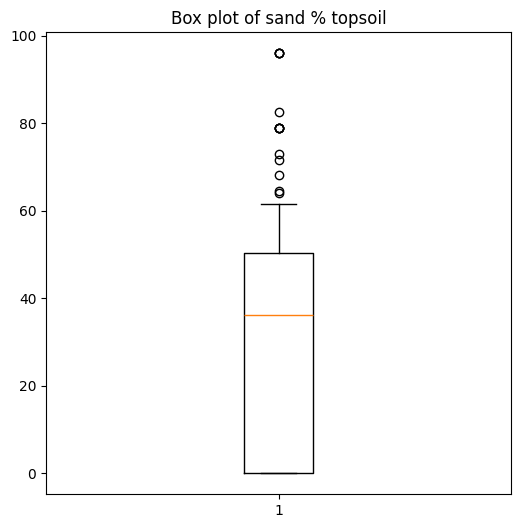

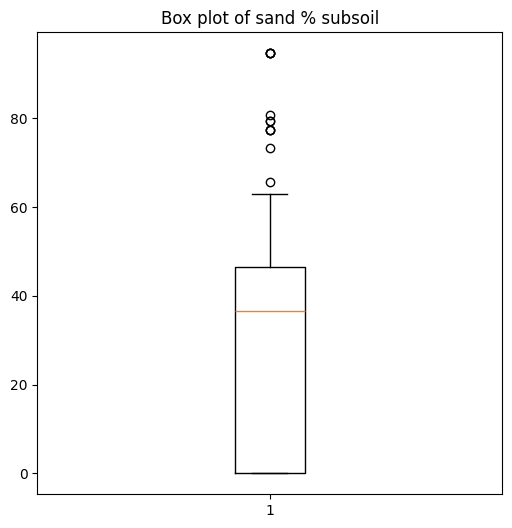

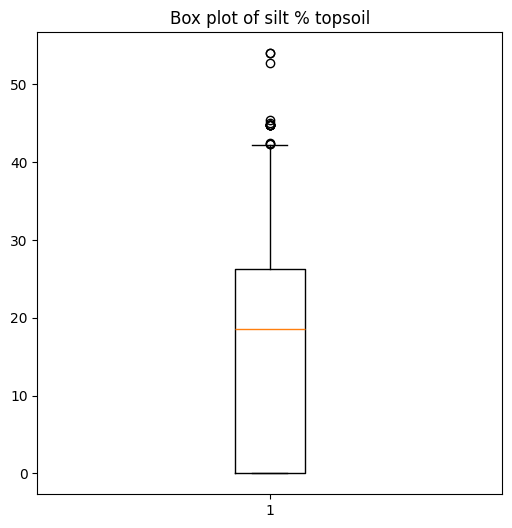

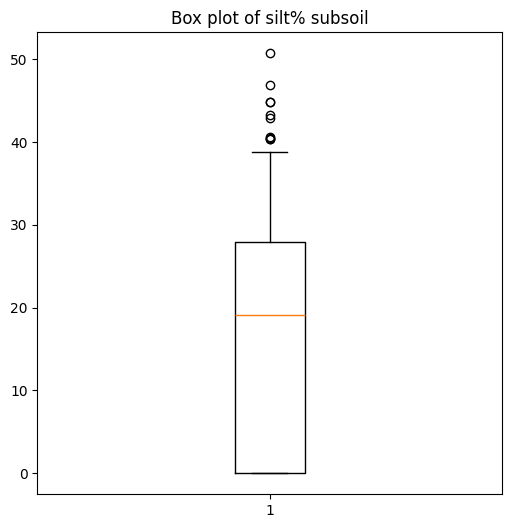

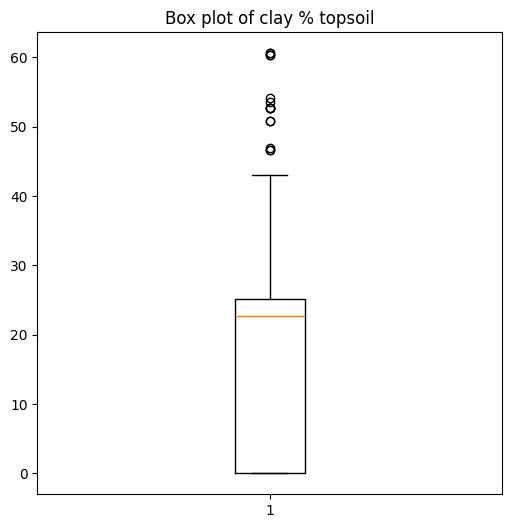

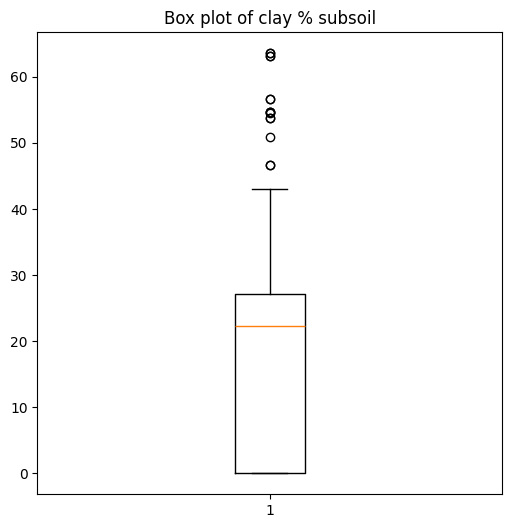

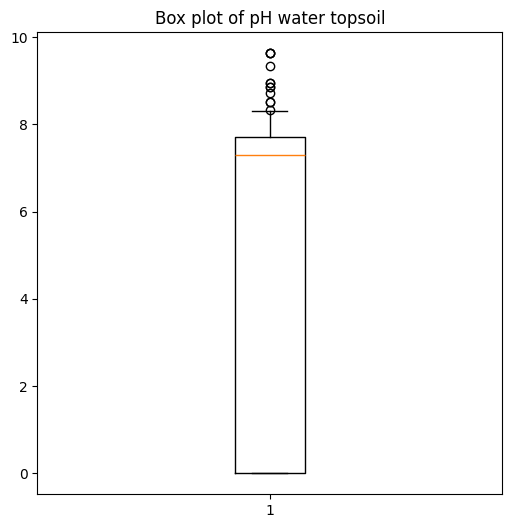

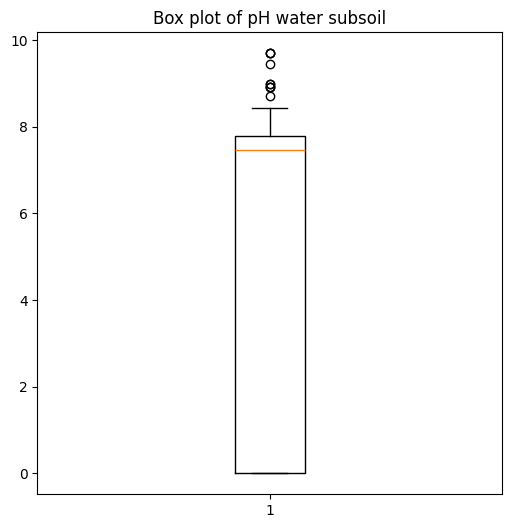

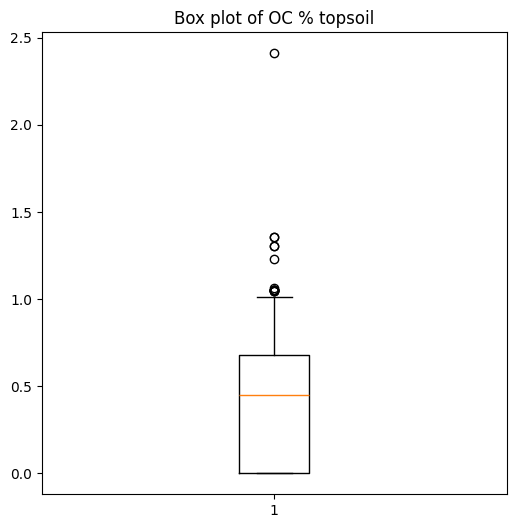

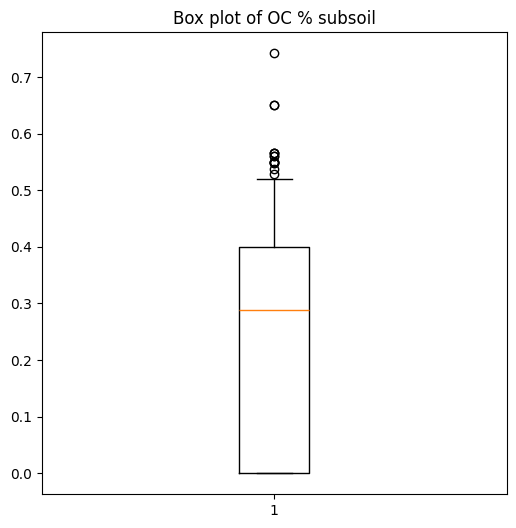

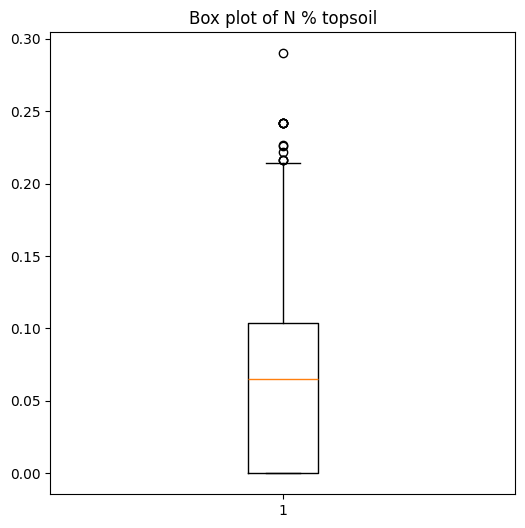

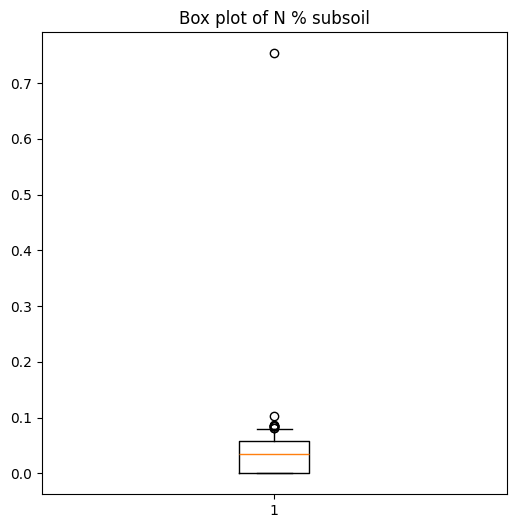

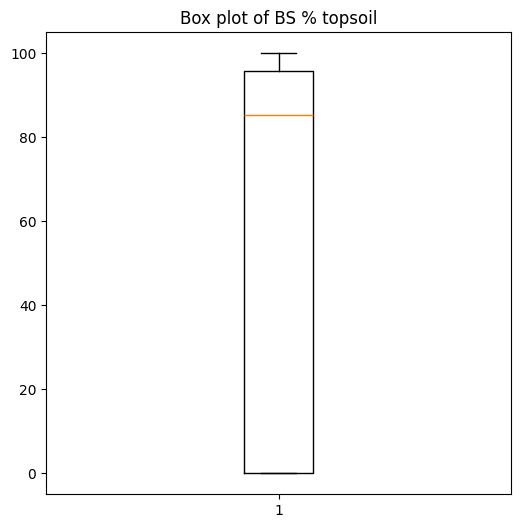

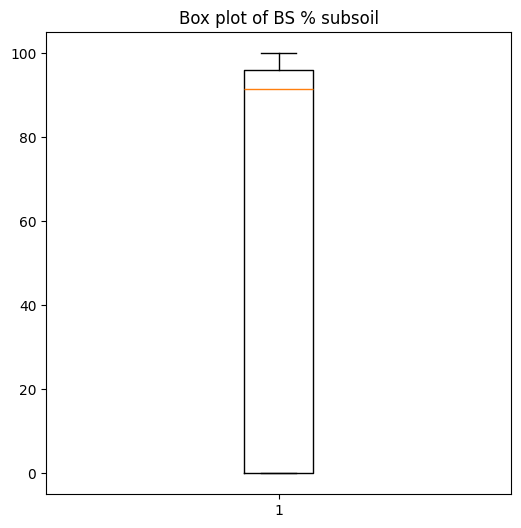

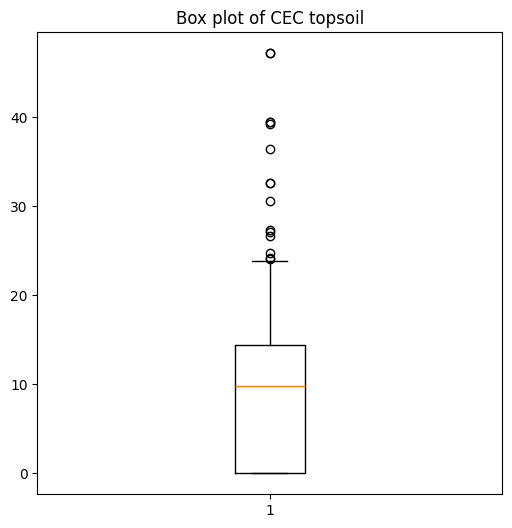

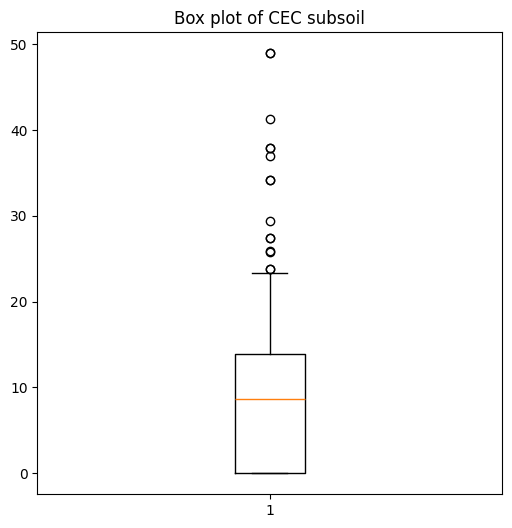

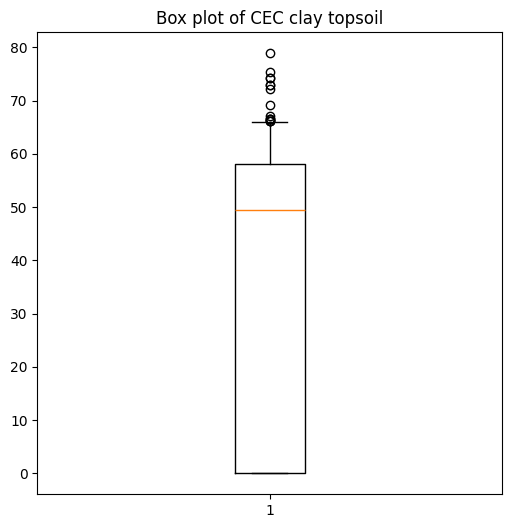

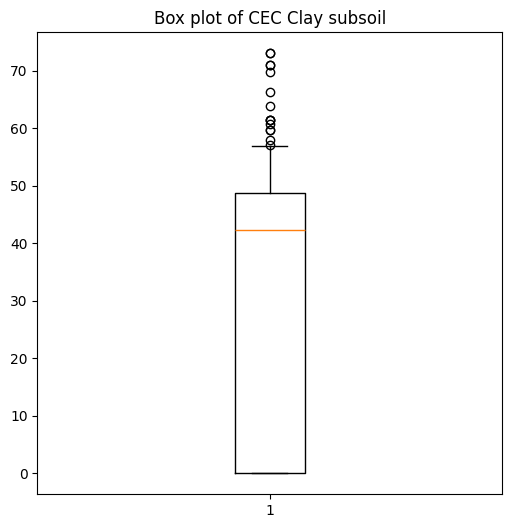

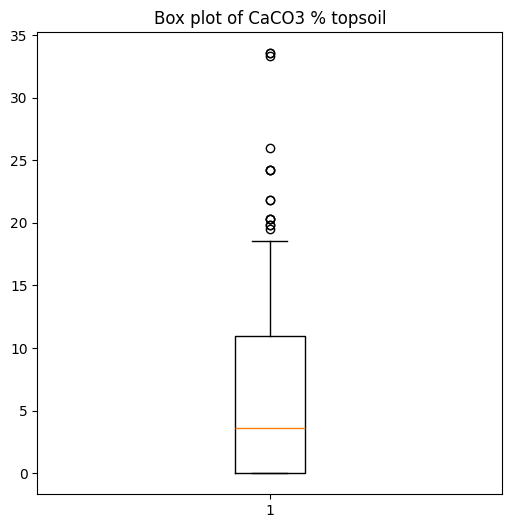

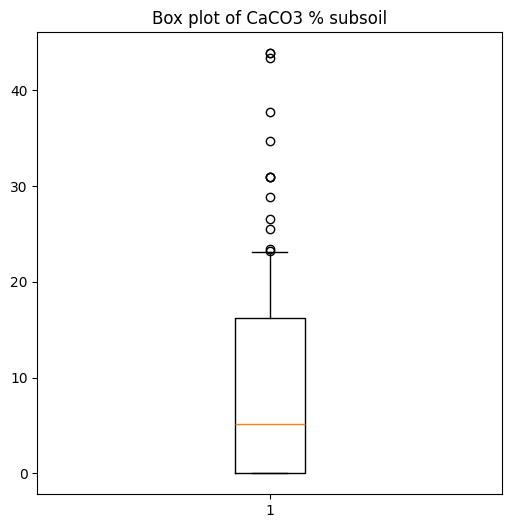

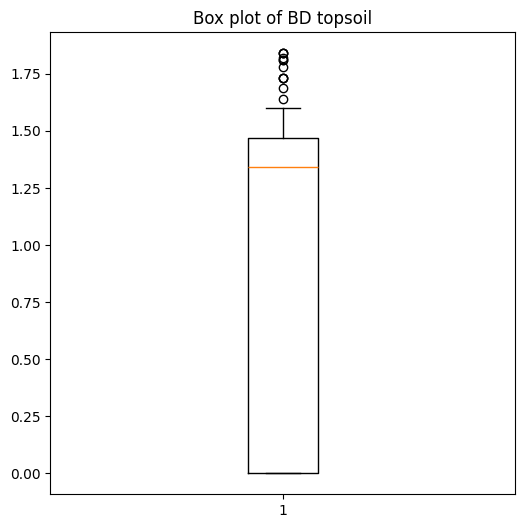

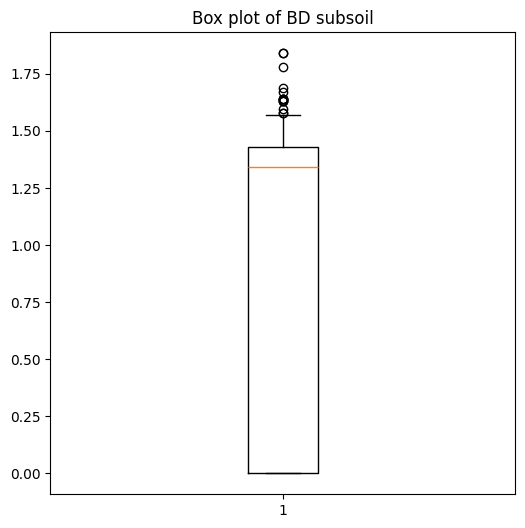

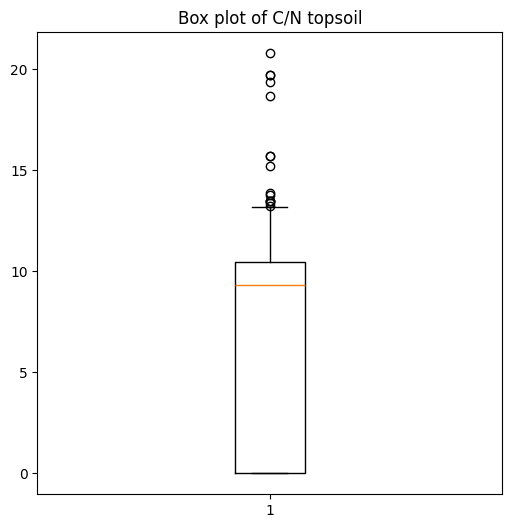

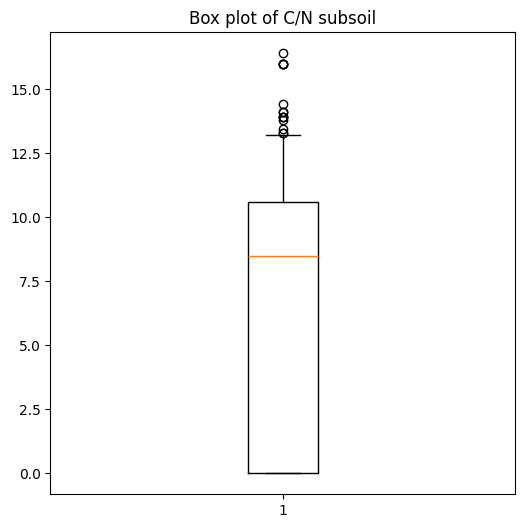

In [10]:
# box plot of each numerical value
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(6, 6))
        plt.boxplot(df_soil[column], whis=[5, 95])
        plt.title(f"Box plot of {column}")
        plt.show()


### 5. Histogramme displays: 

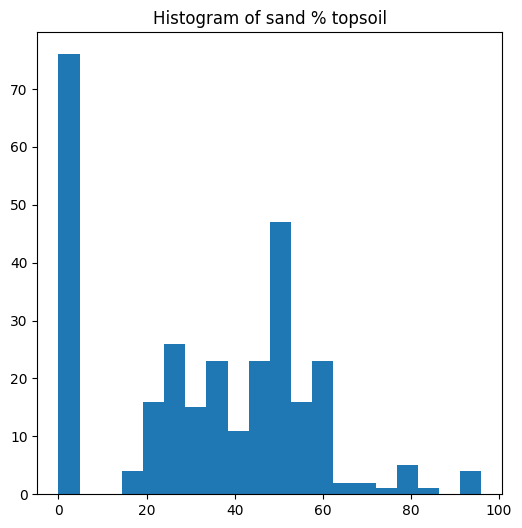

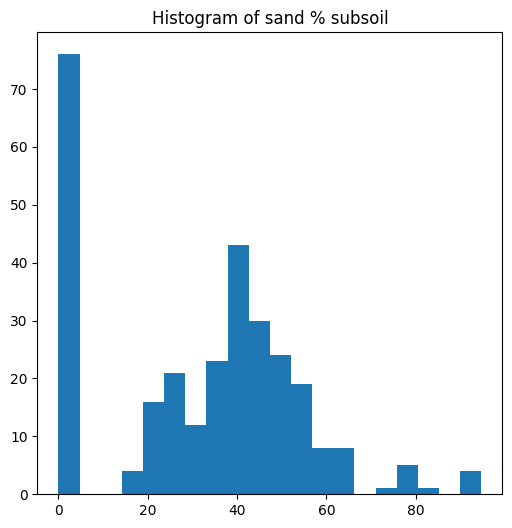

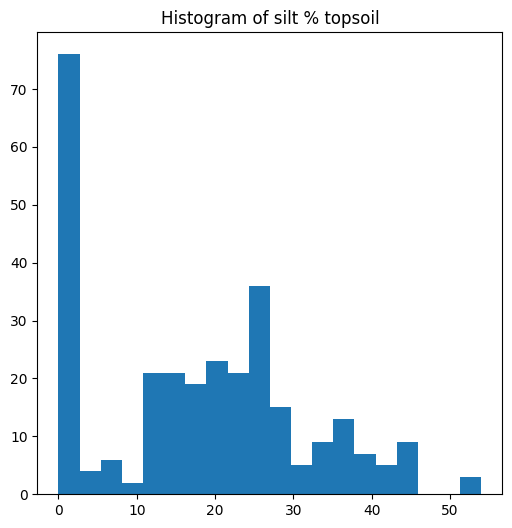

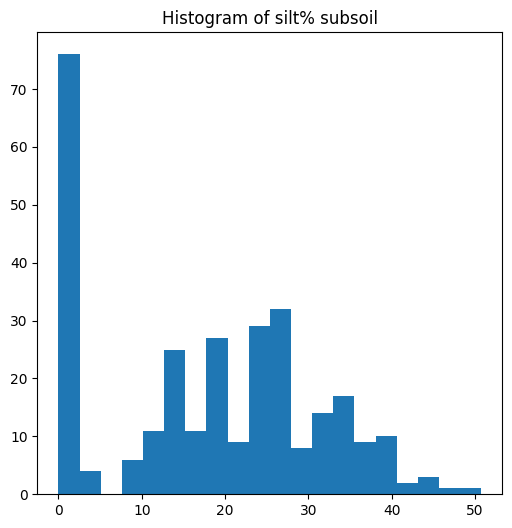

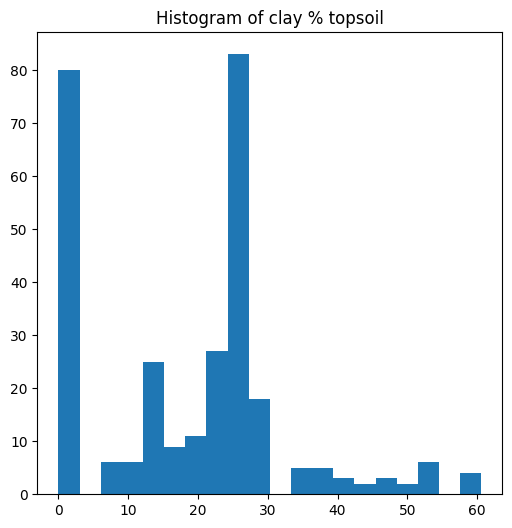

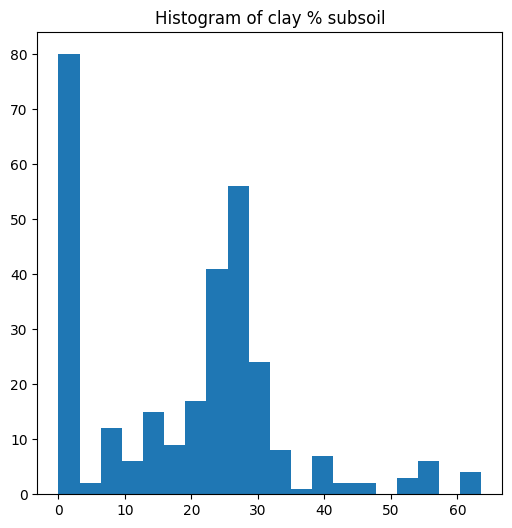

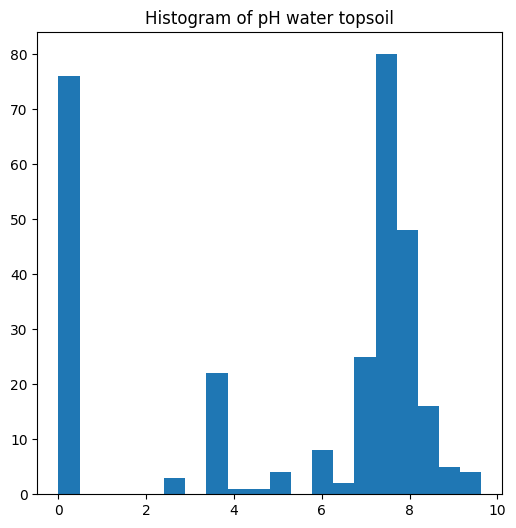

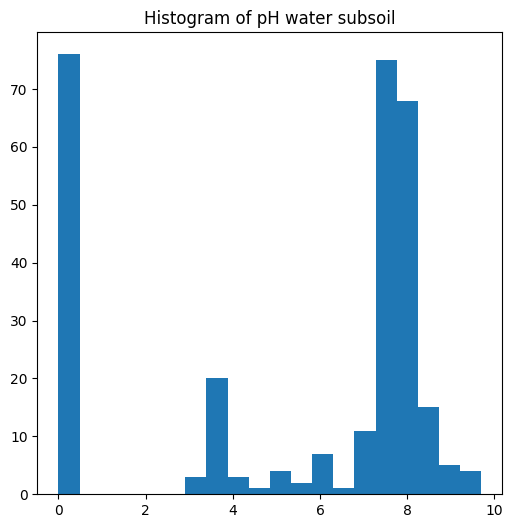

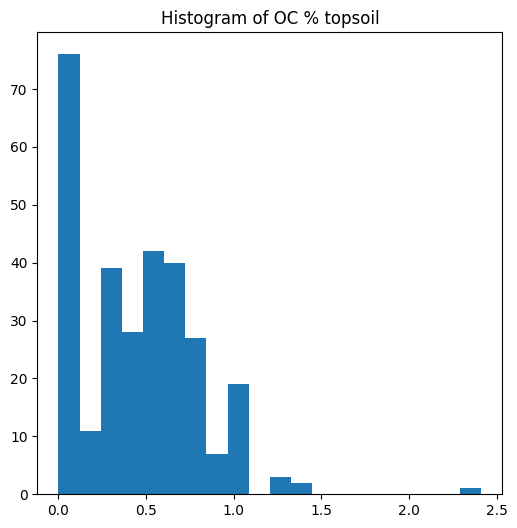

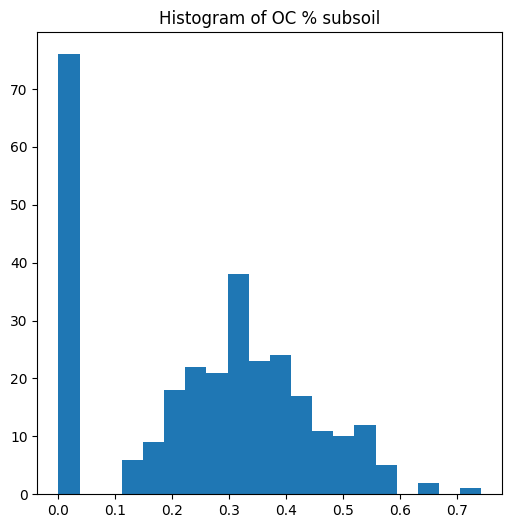

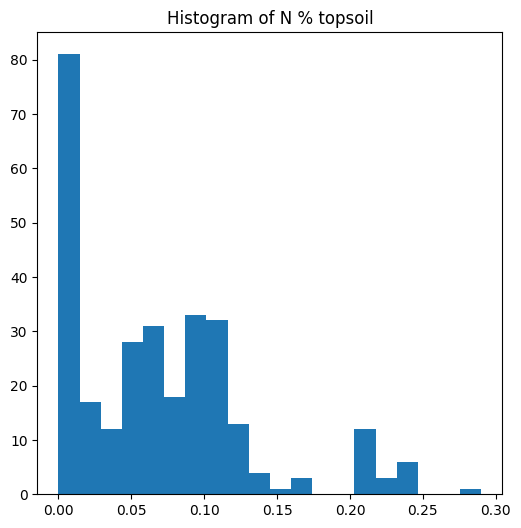

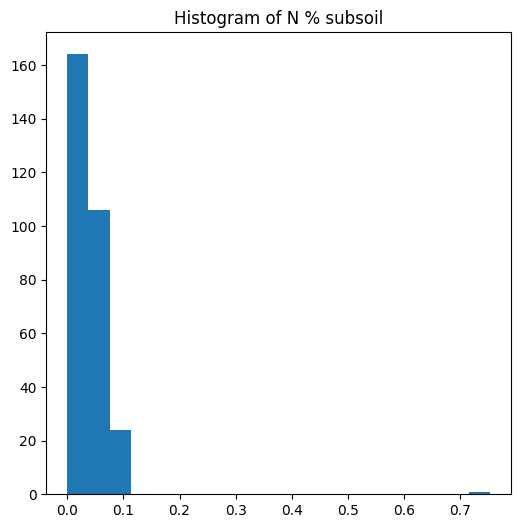

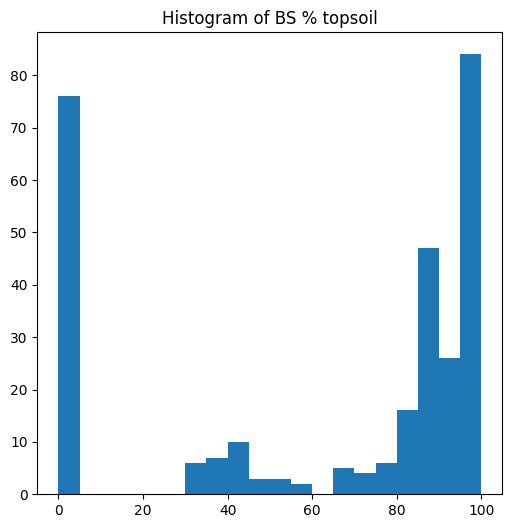

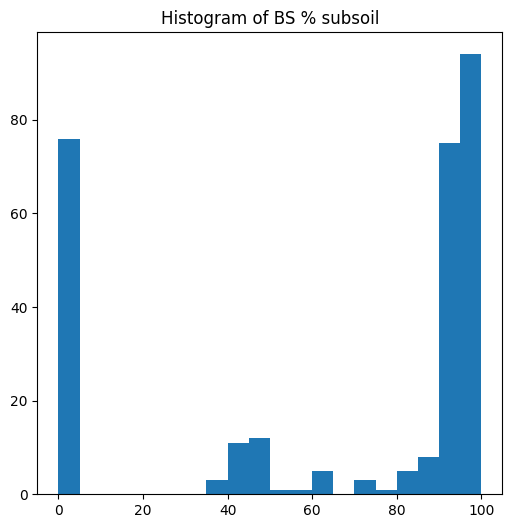

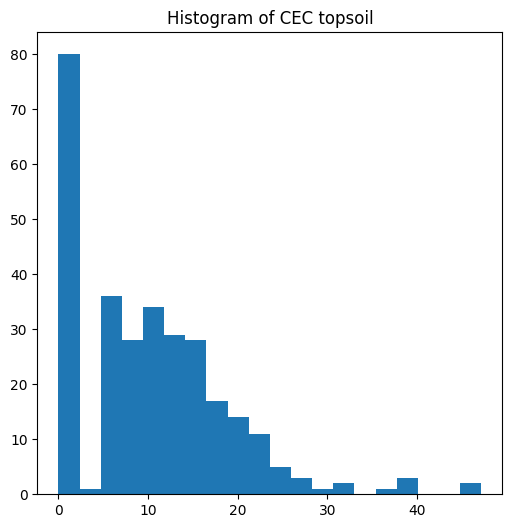

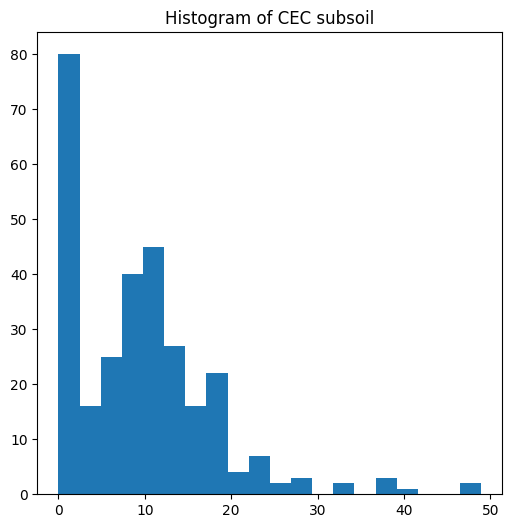

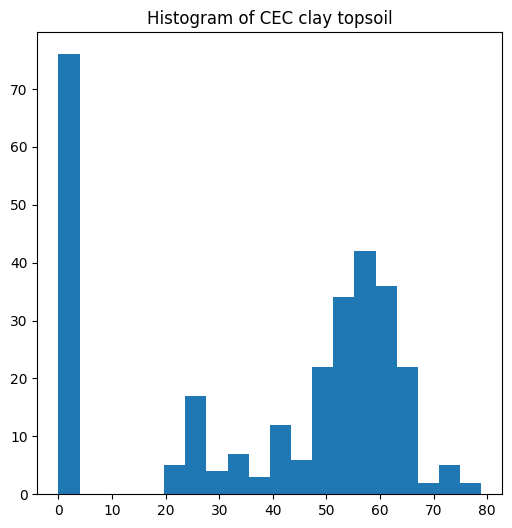

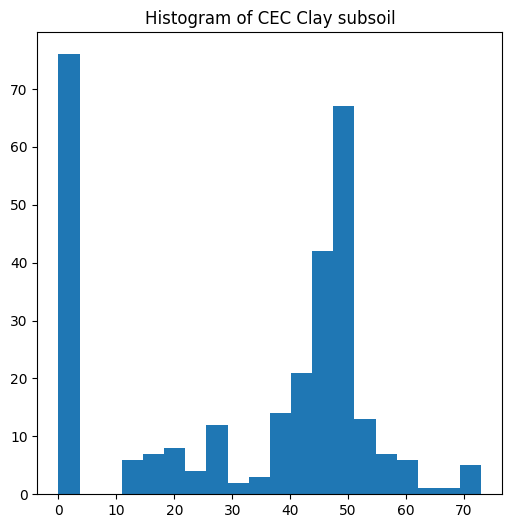

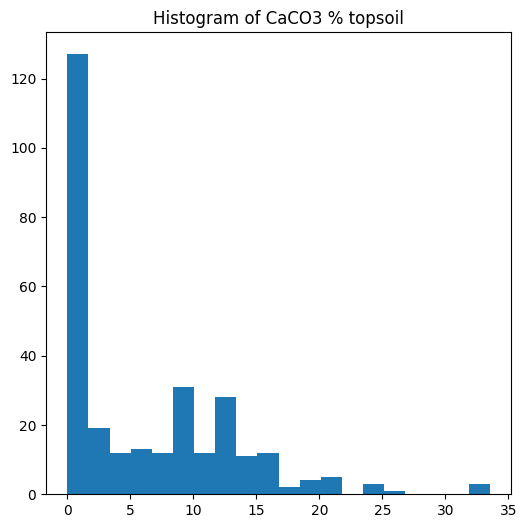

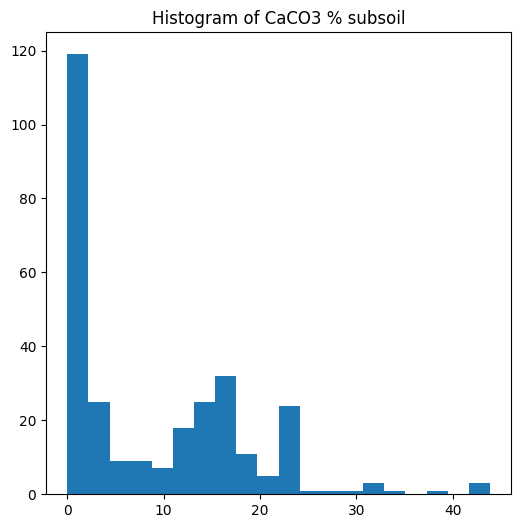

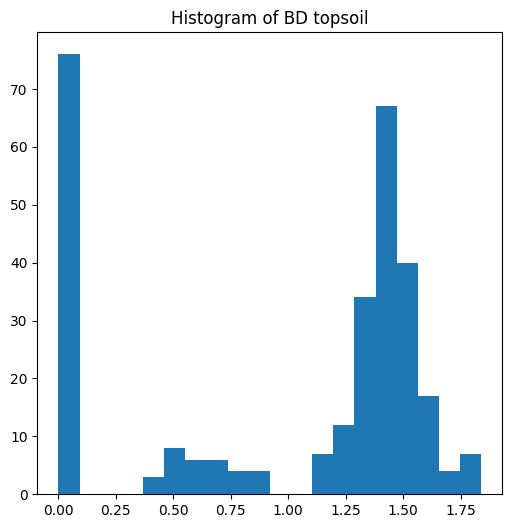

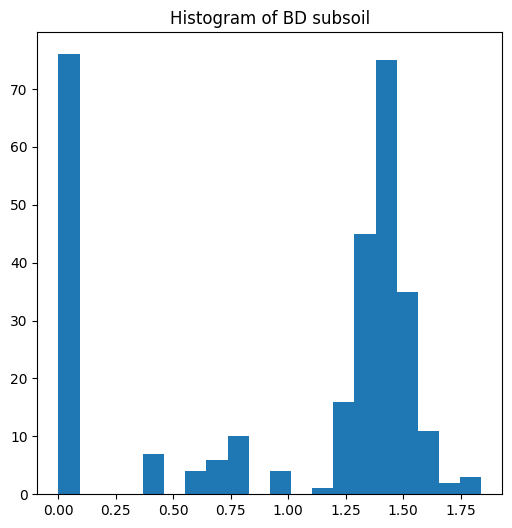

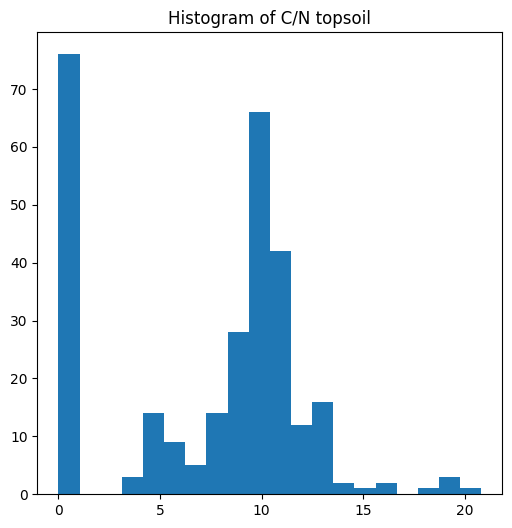

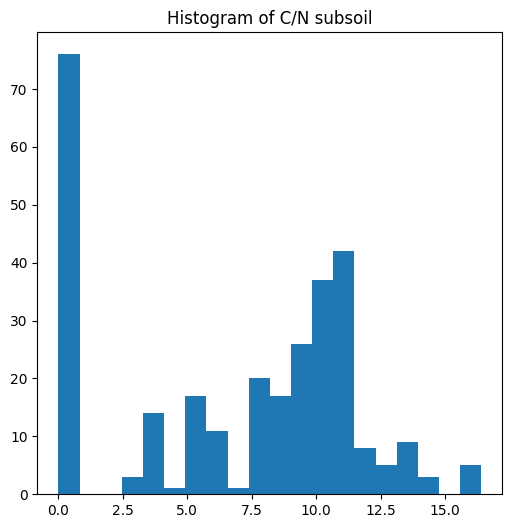

In [11]:
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(6, 6))
        plt.hist(df_soil[column], bins=20)
        plt.title(f"Histogram of {column}")
        plt.show()

b. Scatter plot for data

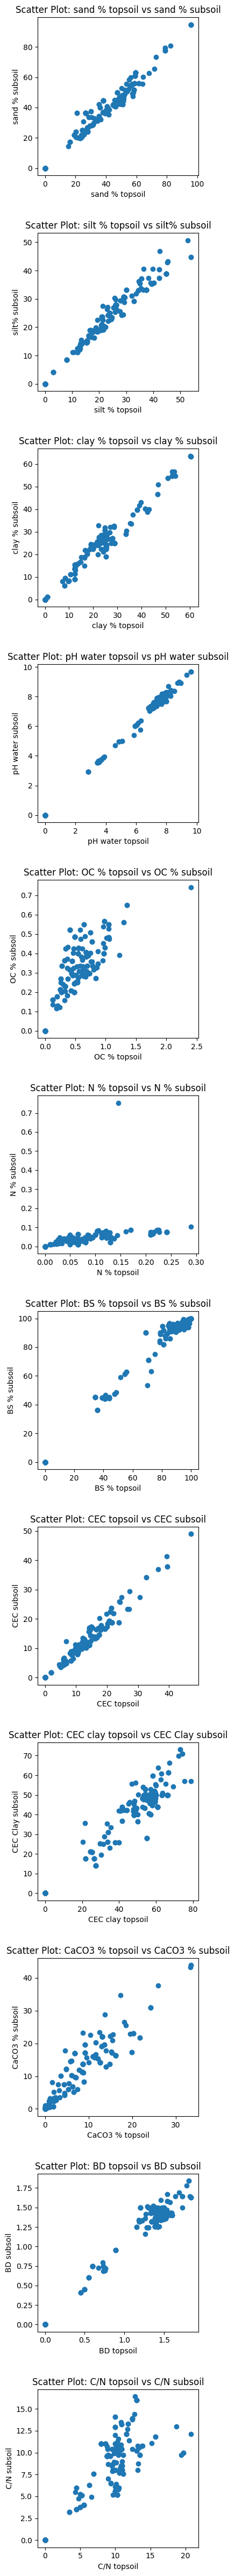

In [4]:
top_soil = ['sand % topsoil', 'silt % topsoil','clay % topsoil',  'pH water topsoil','OC % topsoil',  'N % topsoil',
        'BS % topsoil', 'CEC topsoil','CEC clay topsoil','CaCO3 % topsoil',  'BD topsoil', 'C/N topsoil']
sub_soil =['sand % subsoil','silt% subsoil', 'clay % subsoil', 'pH water subsoil',  'OC % subsoil','N % subsoil',
        'BS % subsoil','CEC subsoil', 'CEC Clay subsoil','CaCO3 % subsoil',  'BD subsoil','C/N subsoil']
fig, axes = plt.subplots(nrows=len(top_soil), ncols=1, figsize=(4, 4 * len(top_soil)))
for i in range(len(top_soil)):
        col1 = top_soil[i]
        col2 = sub_soil[i]
        axes[i].scatter(df_soil[col1],df_soil[col2])
        axes[i].set_xlabel(col1)
        axes[i].set_ylabel(col2)
        axes[i].set_title(f'Scatter Plot: {col1} vs {col2}')
plt.tight_layout(h_pad=3, w_pad=1.5)  
plt.show()

We can deduct that there is a positove correlaction between them , a strong one for example sand% , silt% , clay% , ph , caco3 , N% ...etc and some other less strong like OC% and C/N

Now we need to visualize the relation between each attribute and other attribute (for example and and other components in top soil) best solution for this ? HeatMap for sure haha

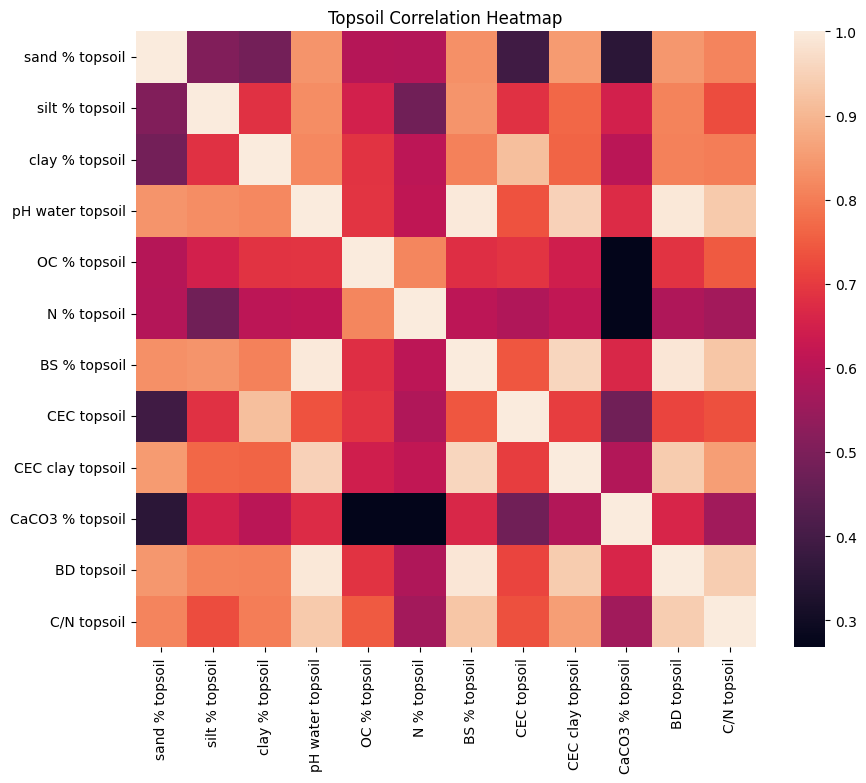

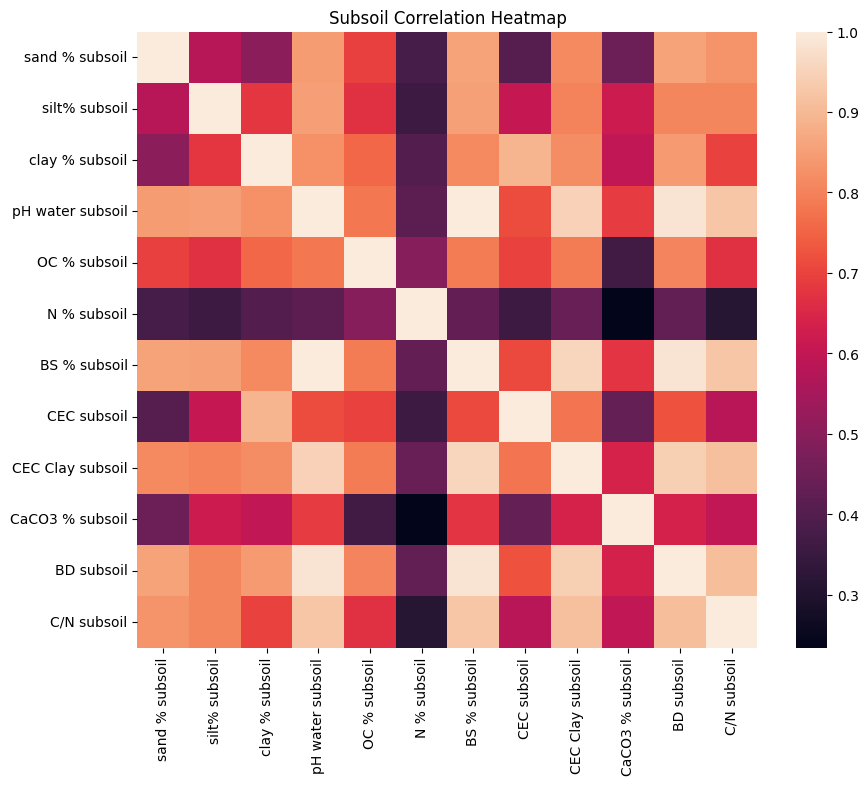

In [5]:
df_topsoil = df_soil.drop(columns=sub_soil).drop(columns=["geometry" , "CNT_FULLNAME"])
df_subsoil = df_soil.drop(columns=top_soil).drop(columns=["geometry" , "CNT_FULLNAME"])
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
p1 = sns.heatmap(df_topsoil.corr())
plt.title('Topsoil Correlation Heatmap')
plt.show()


plt.figure(figsize=(10, 8))  # Adjust figure size as needed
p2 = sns.heatmap(df_subsoil.corr())
plt.title('Subsoil Correlation Heatmap')
plt.show()

from here we can get information about correlation between diffrent attribute like : BS and PH in both top soil and sub soil and small correlation between BD and PH ( i believe we can't really delete one of this attribute)

# A. Data manipulation (climat data)

### 1.2. Extarct Algeria's polygone 


In [ ]:
def extract_shapefile_data(shapefile_path):
    try:
        sf = shapefile.Reader(shapefile_path)
        fields = sf.fields[1:] 
        records = sf.records()
        shapes = sf.shapes()

        data = []
        for i in range(len(shapes)):
            record = records[i]
            shape = shapes[i]
            feature_data = dict(zip([f[0] for f in fields], record))

            # Handle different geometry types:
            if shape.shapeTypeName == "POINT":
                feature_data["geometry"] = {"type": "Point", "coordinates": shape.points[0]}
            elif shape.shapeTypeName == "POLYLINE":
                feature_data["geometry"] = {"type": "LineString", "coordinates": shape.points}
            elif shape.shapeTypeName == "POLYGON":
                feature_data["geometry"] = {"type": "Polygon", "coordinates": [shape.points]} 
            elif shape.shapeTypeName == "MULTIPOINT":
                feature_data["geometry"] = {"type": "MultiPoint", "coordinates": shape.points}
            elif shape.shapeTypeName == "MULTIPATCH":
                feature_data["geometry"] = {"type": "MultiPolygon", "coordinates": shape.points} 
            else:
                feature_data["geometry"] = {"type": "Unknown", "coordinates": None}

            data.append(feature_data)
        return data

    except Exception as e:
        print(f"Error reading shapefile: {e}")
        return None


shapefile_path = "Country/Country.shp"
dataset = extract_shapefile_data(shapefile_path)

#add it to a text file to understand the format
"""with open("result.txt" , "w" , encoding="UTF8") as file:
    for i in dataset:
        file.write(str(i)+"\n\n\n\n")"""

shp file : are the files who containe the name of the Countries and the gemoetry of it reperesented as polygone of points 

In [ ]:
# extract data about Algeria
with open("result.txt" , "w" , encoding="UTF8") as file:
    for i in dataset : 
        if i["CNTRY_NAME"]=="Algeria":
            file.write(str(i)+"\n\n\n\n")
            df_country = i
            break #get only the first one
df_country


{'AREA': 213.434727222,
 'PERIMETER': 73.4355695603,
 'CNT1M_1_': 12824,
 'CNT1M_1_ID': 11914,
 'FAO_NAME': 'Algeria',
 'FAO_CODE': 4,
 'UN_CODE': 12,
 'ISO_CODE': 'DZ',
 'CNTRY_NAME': 'Algeria',
 'ISO3_CODE': 'DZA',
 'geometry': {'type': 'Polygon',
  'coordinates': [[(7.5183162689209, 37.0362396240234),
    (7.5273609161377, 37.0252532958984),
    (7.53467607498169, 37.0205574035645),
    (7.54997682571411, 37.0107307434082),
    (7.55525875091553, 37.0007858276367),
    (7.59655618667603, 36.9762115478516),
    (7.61074781417847, 36.9713172912598),
    (7.62482213973999, 36.969165802002),
    (7.63160514831543, 36.9707183837891),
    (7.64247608184814, 36.9700889587402),
    (7.6534948348999, 36.9795455932617),
    (7.65644979476929, 36.9839782714844),
    (7.65844917297363, 36.982666015625),
    (7.65776300430298, 36.9798889160156),
    (7.66192483901978, 36.9758682250977),
    (7.67256784439087, 36.9738540649414),
    (7.67612218856812, 36.9776153564453),
    (7.67987489700317, 36.

for the dbf file is a set of descriptive infos about the data of shp file (its easy to understand so ne need to exploit this file) , same for shx file its kinda an index for fast access to .shp file that we don't really need it ( ig we will in case we want to ptimize the code to extract the Algeria info faster ...) same for .prj file

### 1.3. Combine soil and Country to get only data about Algerian soils

In [52]:
polygon = df_country["geometry"]["coordinates"][0]
polygon

[(7.5183162689209, 37.0362396240234),
 (7.5273609161377, 37.0252532958984),
 (7.53467607498169, 37.0205574035645),
 (7.54997682571411, 37.0107307434082),
 (7.55525875091553, 37.0007858276367),
 (7.59655618667603, 36.9762115478516),
 (7.61074781417847, 36.9713172912598),
 (7.62482213973999, 36.969165802002),
 (7.63160514831543, 36.9707183837891),
 (7.64247608184814, 36.9700889587402),
 (7.6534948348999, 36.9795455932617),
 (7.65644979476929, 36.9839782714844),
 (7.65844917297363, 36.982666015625),
 (7.65776300430298, 36.9798889160156),
 (7.66192483901978, 36.9758682250977),
 (7.67256784439087, 36.9738540649414),
 (7.67612218856812, 36.9776153564453),
 (7.67987489700317, 36.9765663146973),
 (7.68263101577759, 36.9720497131348),
 (7.69228410720825, 36.9663391113281),
 (7.69731998443604, 36.9687614440918),
 (7.70018005371094, 36.9686050415039),
 (7.70207595825195, 36.9571914672852),
 (7.70446920394897, 36.9545021057129),
 (7.7112717628479, 36.9555931091309),
 (7.72080326080322, 36.95973587

In [53]:
polygon = df_country["geometry"]["coordinates"][0]
max_x =polygon[0][0]
min_x =polygon[0][0]
max_y =polygon[0][1]
min_y =polygon[0][1]
for i in polygon : 
    max_x = max(max_x , i[0])
    min_x = min(min_x , i[0])
    max_y = max(max_y , i[1])
    min_y = min(min_y , i[1])
print(str(max_x) ,str(min_x) , str(max_y) ,str(min_y) )

11.9795484542847 -8.67386722564697 37.0937347412109 18.9600276947021


functions returns if a polygone is inside another polygon

In [ ]:
def intersects(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    if x2 == x3:
        return (x2 >= x1 and min(y2, y3) <= y1 <= max(y2, y3))

    if y2 == y3:
        return (y2 == y1 and min(x2, x3) <= x1 <= max(x2, x3))

    if (y2 <= y1 < y3 or y3 <= y1 < y2) and \
            x1 < (x3 - x2) * (y1 - y2) / (y3 - y2) + x2:
        return True
    else:
        return False


def is_point_inside(point, polygon):
    x, y = point
    intersections = 0
    for i in range(len(polygon)):
        p2 = polygon[i]
        p3 = polygon[(i + 1) % len(polygon)] 
        if intersects((x,y), p2, p3):
            intersections += 1
    return intersections % 2 == 1

def is_polygon_inside(smaller_polygon, larger_polygon):
    for vertex in smaller_polygon:
        if is_point_inside(vertex, larger_polygon):
            return True
    return False
points_within = 0
larger_polygon = df_country["geometry"]["coordinates"][0]
print("unloaded polyogones at indexes:")
for i in df_soil["geometry"] : 
    mark = df_soil["geometry"].index(i)
    try : 
        mark = df_soil["geometry"].index(i)
        polygon = wkt.loads(i)
        cords = list(polygon.exterior.coords)
        smaller_polygon = cords
        inside = is_polygon_inside(smaller_polygon, larger_polygon)
        if inside:
            points_within += 1
    except Exception as e : 
        print(f'index {mark}')
        continue

print(f"Number of points within Algerian National territory: {points_within}")

[(-1.6424700021743774, 34.68141174316406), (-1.6514999866485596, 34.66817855834961), (-1.6766899824142456, 34.63359069824219), (-1.7077200412750244, 34.6137809753418), (-1.786520004272461, 34.599510192871094), (-1.8058500289916992, 34.601219177246094), (-1.81427001953125, 34.611351013183594), (-1.7610900402069092, 34.687870025634766), (-1.756700038909912, 34.68843078613281), (-1.7529100179672241, 34.679630279541016), (-1.7345499992370605, 34.678260803222656), (-1.7070499658584595, 34.676239013671875), (-1.6424700021743774, 34.68141174316406)]
[(9.578709602355957, 30.23147964477539), (9.50158977508545, 30.20046043395996), (9.455140113830566, 30.170520782470703), (9.413350105285645, 30.15382957458496), (9.36421012878418, 30.11713981628418), (9.335049629211426, 30.081300735473633), (9.31406021118164, 30.0385799407959), (9.316679954528809, 30.001190185546875), (9.363519668579102, 29.958940505981445), (9.398460388183594, 29.97100067138672), (9.481300354003906, 30.017419815063477), (9.509090

### 1.4 Extract all climat files and save only the data that is inside ALGERIA (using lat and lon)

In [ ]:
filepath = "Climate-DATA"
variables = ['PSurf', 'Wind', 'Qair', 'Tair', 'Snowf', 'Rainf']
output_filename = "output.csv"

def extract_data(filepath, base_filename, variables):
    data = {}
    time = None
    lat = None
    lon = None
    base_filename = "_".join(base_filename.split("_")[1:])
    for var in variables:
        filename = f"{var}_{base_filename}" 
        full_path = os.path.join(filepath, filename)
        try:
            dataset = netCDF4.Dataset(full_path, 'r')
            if time is None:
                time = netCDF4.num2date(dataset.variables['time'][:], dataset.variables['time'].units)
                lat = dataset.variables['lat'][:]
                lon = dataset.variables['lon'][:]
            data[var] = dataset.variables[var][:]
            dataset.close()
        except (FileNotFoundError, KeyError, OSError) as e:
            print(f"Error processing {filename}: {e}. Filling with NaN.")
            if time is None:
                print("Missing essential file, skipping this iteration.")
                return None, None, None, None
            data[var] = np.nan * np.ones(data['PSurf'].shape)
    return time, lat, lon, data

try:
    df = pd.DataFrame()
    for filename in os.listdir(filepath):
        if "PSurf" in filename:
            base_filename = filename
            time, lat, lon, data = extract_data(filepath, base_filename, variables)
            if data is None:
                print("skipped")
                continue
            print("passed")
            index = pd.MultiIndex.from_product([time, lat, lon], names=['time', 'lat', 'lon'])
            temp_df = pd.DataFrame(index=index)
            for var, val in data.items():
                temp_df[var] = val.flatten()
            temp_df = temp_df[
                (temp_df.index.get_level_values('lat') >= min_x) &
                (temp_df.index.get_level_values('lat') <= max_x) &
                (temp_df.index.get_level_values('lon') >= min_y) &
                (temp_df.index.get_level_values('lon') <= max_y)
            ]
            df = pd.concat([df, temp_df])
    df.fillna(0, inplace=True)
    df.to_csv(output_filename)
    print(f"Data written to {output_filename}")

except Exception as e:
    print(f"An error occurred: {e}")

print("Done")

passed
passed
passed
passed
passed
passed
passed
passed
passed
passed
passed
passed
Data written to output.csv
Done


### 1. data import and visualise

Trying to extends relations between attributes

In [ ]:
df_climat = pd.read_csv("output.csv")
df_climat

,time,lat,lon,PSurf,Wind,Qair,Tair,Snowf,Rainf
0,2019-01-01 00:00:00,-8.25,19.25,89065.266,0.821201,0.013997,291.04965,0.0,0.000545
1,2019-01-01 00:00:00,-8.25,19.75,89670.760,1.245674,0.014514,291.70743,0.0,0.000000
2,2019-01-01 00:00:00,-8.25,20.25,90563.360,1.164034,0.014357,291.66382,0.0,0.000438
3,2019-01-01 00:00:00,-8.25,20.75,91422.460,1.046393,0.014764,292.07610,0.0,0.000140
4,2019-01-01 00:00:00,-8.25,21.25,91752.500,0.962537,0.016113,293.50247,0.0,0.000028
...,...,...,...,...,...,...,...,...,...
12929755,2019-12-31 23:00:00,11.75,34.75,94652.914,3.388915,0.004195,295.76760,0.0,0.000000
12929756,2019-12-31 23:00:00,11.75,35.25,93989.750,2.576853,0.004528,294.77472,0.0,0.000000
12929757,2019-12-31 23:00:00,11.75,35.75,92657.660,2.075049,0.005217,292.89896,0.0,0.000000
12929758,2019-12-31 23:00:00,11.75,36.25,89757.880,0.859402,0.005553,288.89166,0.0,0.000000


### 2. full description of the Climat dataset : 

 
This dataset contains hourly meteorological data for Algeria during 2019, encompassing surface pressure, rainfall, snowfall, air temperature, specific humidity, and wind speed/vector. Visual analysis reveals negligible snowfall throughout the year. The average accumulated values for air temperature, wind speed, and surface pressure across the four seasons 

### 3. Updating/deleting an instance

In [17]:
print("=================Menu=================")
for index , i in enumerate(df_climat.columns):
    print(f"{index+1}.delete {i} column")
column_to_delete = int(input("choose the column to delete : ")) 
if (column_to_delete <= len(df_climat.columns)) & (column_to_delete >=0):
    df_climat = df_climat.drop(columns=df_climat.columns[column_to_delete-1]) 
df_climat.head()

=================Menu=================
1.delete time column
2.delete lat column
3.delete lon column
4.delete PSurf column
5.delete Wind column
6.delete Qair column
7.delete Tair column
8.delete Snowf column
9.delete Rainf column


,time,lat,lon,PSurf,Wind,Qair,Tair,Rainf
0,2019-01-01 00:00:00,-8.25,19.25,89065.266,0.821201,0.013997,291.04965,0.000545
1,2019-01-01 00:00:00,-8.25,19.75,89670.760,1.245674,0.014514,291.70743,0.000000
2,2019-01-01 00:00:00,-8.25,20.25,90563.360,1.164034,0.014357,291.66382,0.000438
3,2019-01-01 00:00:00,-8.25,20.75,91422.460,1.046393,0.014764,292.07610,0.000140
4,2019-01-01 00:00:00,-8.25,21.25,91752.500,0.962537,0.016113,293.50247,0.000028


# B. Data Analytics

### 1. Central tendecy

In [ ]:
           
print(f"Taille du Dataset: {len(df_climat)}")
nb_null = 0
for column in df_climat.columns:
    if df_climat[column].dtype in ['float64', 'int64']:
        mean_value = df_climat[column].mean()
        median_value = df_climat[column].median()
        mode_value = df_climat[column].mode()
        nb_null = 0
        for val in df_climat[column]:
            if np.isnan(val):
                nb_null += 1
        print(f"Mean of {column}: {mean_value} /  Median of {column}: {median_value} / Number of Mode values for  {column}: {len(mode_value)}")
        for val in mode_value:
          if mean_value == median_value == val:
             sym = True
          else:
            sym = False
        if sym:
          print("Symmetrical distribution detected !")
        else:
          print("No symmetrical distribution has been detected !")

    else:
       print("Non numerical column !")
       print(f"Number of Mode values for  {column} are: {len(df_climat[column].mode())}")
    print(f"\nNumber of missing values in {column}: {nb_null}")
    unique_values = df_climat[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print("\n\n")

Taille du Dataset: 12929760
Mean of lat: 1.75 /  Median of lat: 1.75 / Number of Mode values for  lat: 41
No symmetrical distribution has been detected !
Mean of lon: 28.0 /  Median of lon: 28.0 / Number of Mode values for  lon: 36
No symmetrical distribution has been detected !
Mean of PSurf: 92211.89162575747 /  Median of PSurf: 93792.58 / Number of Mode values for  PSurf: 4
No symmetrical distribution has been detected !
Mean of Wind: 1.9065201314087419 /  Median of Wind: 1.6269034 / Number of Mode values for  Wind: 12
No symmetrical distribution has been detected !
Mean of Qair: 0.014181091816538661 /  Median of Qair: 0.015306796 / Number of Mode values for  Qair: 2
No symmetrical distribution has been detected !
Mean of Tair: 298.01292465740414 /  Median of Tair: 297.3559 / Number of Mode values for  Tair: 1
No symmetrical distribution has been detected !
Mean of Snowf: 0.0 /  Median of Snowf: 0.0 / Number of Mode values for  Snowf: 1
Symmetrical distribution detected !
Mean of Ra

### 2. measures of dispertion

In [ ]:
# measures of dispertion
for column in df_climat.columns:
    
    if df_climat[column].dtype in ['float64', 'int64']:
        min_value = df_climat[column].min()
        max_value = df_climat[column].max()
        # Range of values
        range_value = max_value - min_value
        # variance is the mean squared difference between each data point and the centre of the distribution measured by the mean
        variance_value = df_climat[column].var()
        # standard deviation is the square root of sum of squared deviation from the mean divided by the number of observations.
        std_value = df_climat[column].std()
        # quartils
        quartiles = [df_climat[column].quantile(0),df_climat[column].quantile(0.25), df_climat[column].median(),df_climat[column].quantile(0.5), df_climat[column].quantile(1)]
        # quartiles deviation is the measure of data dispertion 
        quartile_deviation = df_climat[column].quantile(0.75) - df_climat[column].quantile(0.25)

        print(f"Range of {column}: {range_value}")
        print(f"Variance of {column}: {variance_value}")
        print(f"Standard deviation of {column}: {std_value}")
        print(f" Quart 1 : {quartiles[0]}\n Quart 2 : {quartiles[1]}\n Quart 3: {quartiles[2]}\n Quart 4: {quartiles[3]}\n Quart 5: {quartiles[4]} ")
        print(f"Quartile deviation of {column}: {quartile_deviation}")
    print("\n\n")




Range of lat: 20.0
Variance of lat: 35.00000270693367
Standard deviation of lat: 5.916080011877263
 Quart 1 : -8.25
 Quart 2 : -3.25
 Quart 3: 1.75
 Quart 4: 1.75
 Quart 5: 11.75 
Quartile deviation of lat: 10.0



Range of lon: 17.5
Variance of lon: 26.979168753261373
Standard deviation of lon: 5.19414754827598
 Quart 1 : 19.25
 Quart 2 : 23.625
 Quart 3: 28.0
 Quart 4: 28.0
 Quart 5: 36.75 
Quartile deviation of lon: 8.75



Range of PSurf: 23148.899999999994
Variance of PSurf: 17300952.052371304
Standard deviation of PSurf: 4159.441314932968
 Quart 1 : 75968.19
 Quart 2 : 89278.24
 Quart 3: 93792.58
 Quart 4: 93792.58
 Quart 5: 99117.09 
Quartile deviation of PSurf: 6276.809999999998



Range of Wind: 12.338436746000001
Variance of Wind: 1.3025191061888597
Standard deviation of Wind: 1.1412795915939529
 Quart 1 : 0.021965254
 Quart 2 : 1.102303375
 Quart 3: 1.6269034
 Quart 4: 1.6269034
 Quart 5: 12.360402 
Quartile deviation of Wind: 1.3081587250000002



Range of Qair: 0.028973

Deducing Outliers:

Outliers are extreme values in the dataset, that seem odd or dievrgeant form the central tendencies of the analysed data, they are rare and are mostly dur to wrong data introduction to the dataset. thus, greatly affect the central tendenices.

outliers could either be wrong typed values, or naturally odd data,  which is why deleting them isn't necessarly the right solution, they should be wisely manipulated.

We will identify the outliers based on the following rule:

- Finding the median, quartile, and interquartile regions
- Calculate 1.5*IQR below the first quartile and check for low outliers.
- Calculate 1.5*IQR above the third quartile and check for outliers.

In [16]:
for column in df_climat.columns:
    if df_climat[column].dtype in ['float64', 'int64']:
        Q1 = df_climat[column].quantile(0.25)
        Q3 = df_climat[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound =  Q1 - (1.5 * IQR)
        upper_bound =  Q3 + (1.5 * IQR)
        outliers = df_climat[(df_climat[column] < lower_bound) | (df_climat[column] > upper_bound)]
        print(f"Number of outliers in {column}: {len(outliers)}")
        print("\n")

Number of outliers in lat: 0


Number of outliers in lon: 0


Number of outliers in PSurf: 136709


Number of outliers in Wind: 553822


Number of outliers in Qair: 181241


Number of outliers in Tair: 106509


Number of outliers in Snowf: 0


Number of outliers in Rainf: 2232930




### 3. missing and unique values

In [ ]:
for column in df_climat.columns:
    unique_values = df_climat[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print(f"Nombre de valeurs nuls pour {column} est {df_climat[column].isnull().sum()}")
    print("\n")
print("\n\n")
print(f"La taille du dataset est de: {len(df_climat)}")

Number of unique values in time: 8760
Nombre de valeurs nuls pour time est 0
Number of unique values in lat: 41
Nombre de valeurs nuls pour lat est 0
Number of unique values in lon: 36
Nombre de valeurs nuls pour lon est 0
Number of unique values in PSurf: 2111241
Nombre de valeurs nuls pour PSurf est 0
Number of unique values in Wind: 10085467
Nombre de valeurs nuls pour Wind est 0
Number of unique values in Qair: 7390634
Nombre de valeurs nuls pour Qair est 0
Number of unique values in Tair: 950185
Nombre de valeurs nuls pour Tair est 0
Number of unique values in Snowf: 1
Nombre de valeurs nuls pour Snowf est 0
Number of unique values in Rainf: 2179349
Nombre de valeurs nuls pour Rainf est 0



La taille du dataset est de: 12929760


### 4. box plot and define outliers

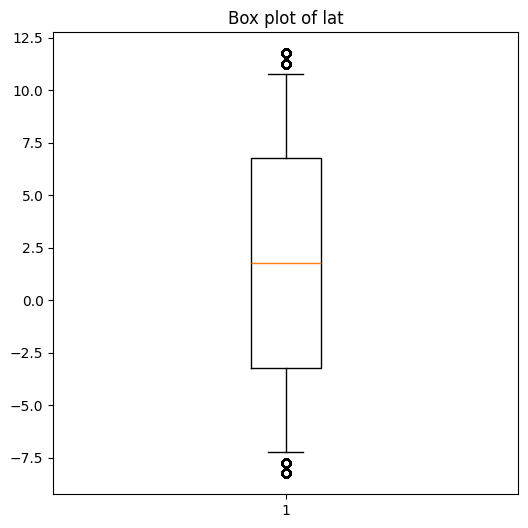

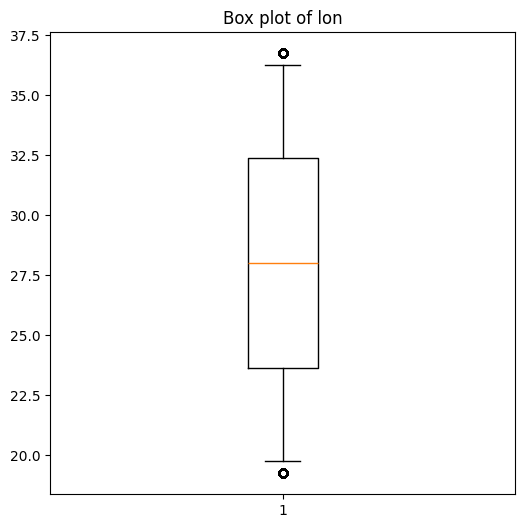

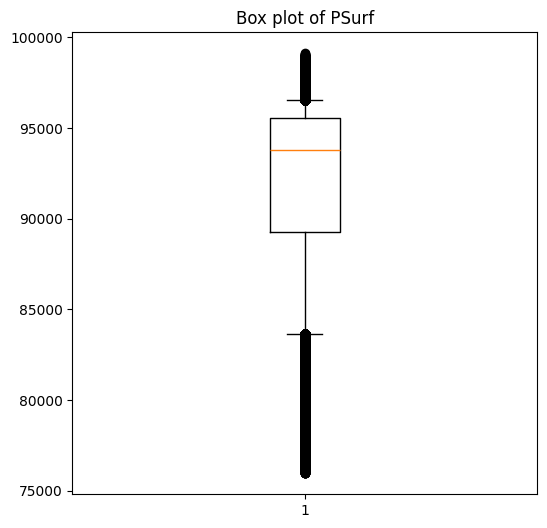

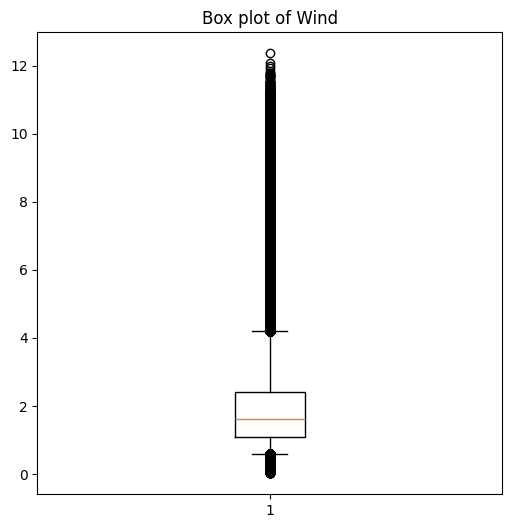

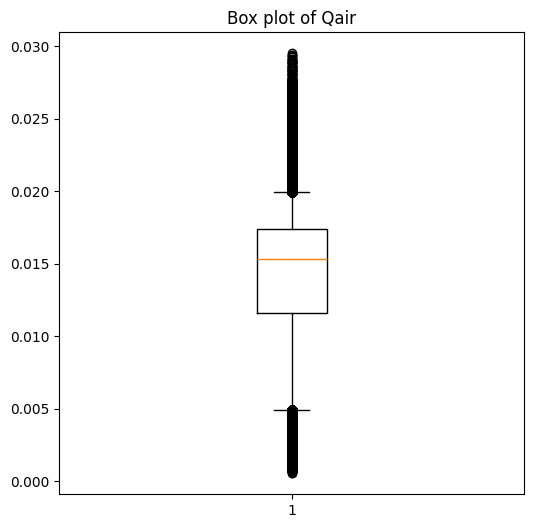

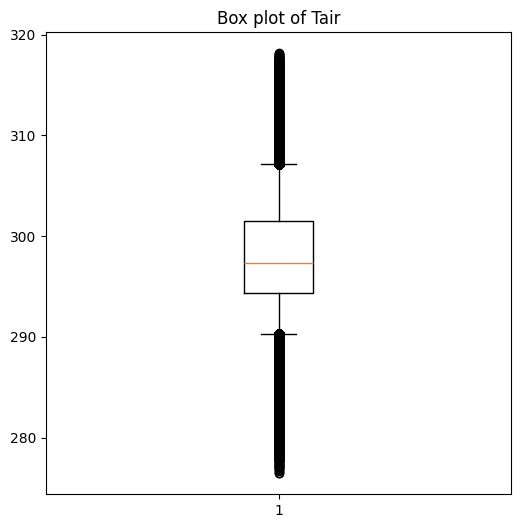

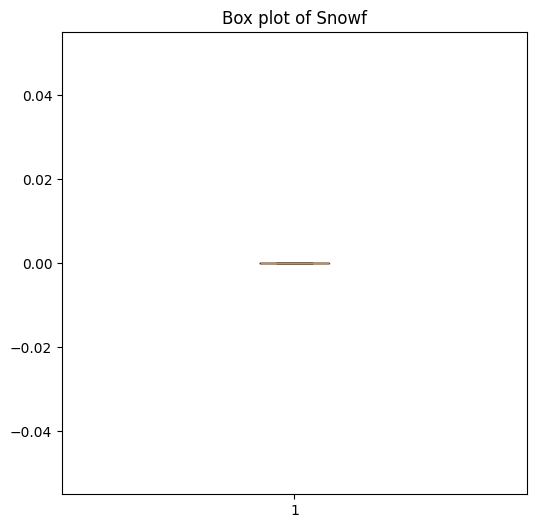

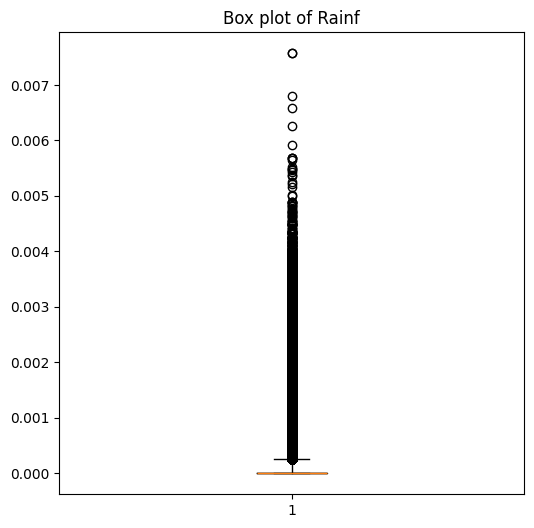

In [19]:
for column in df_climat.columns:
    if df_climat[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(6, 6))
        plt.boxplot(df_climat[column], whis=[5, 95])
        plt.title(f"Box plot of {column}")
        plt.show()

### 5.1 histograms

In [ ]:
import matplotlib.pyplot as plt

# histogram of each numerical value
for column in df_climat.columns:
    if df_climat[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(12, 7))
        plt.hist(df_climat[column], bins=20)
        plt.title(f"Histogram of {column}")
        plt.show()

### 5.2 histograms(by season)

visualizing climat all attribute during the year 

done


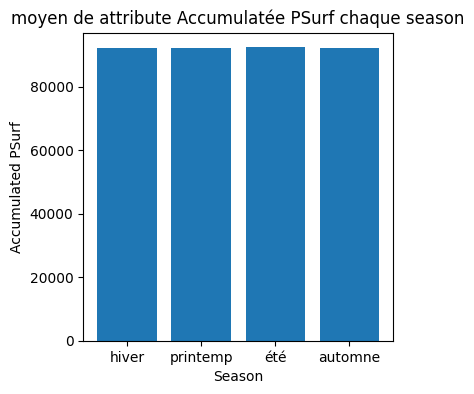

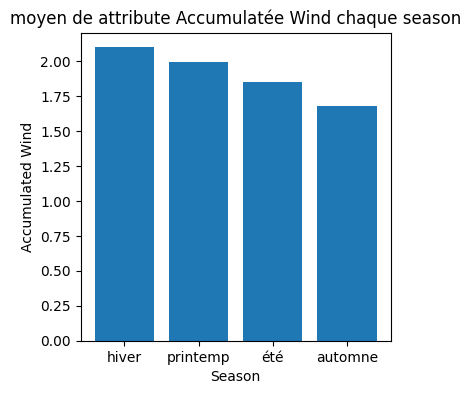

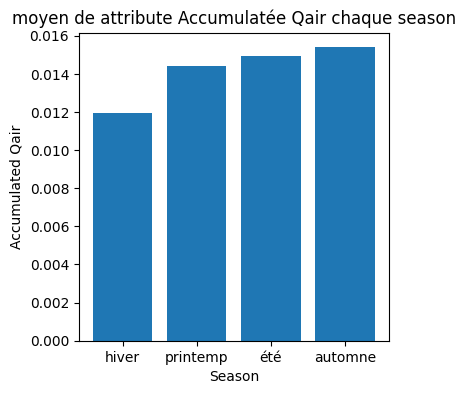

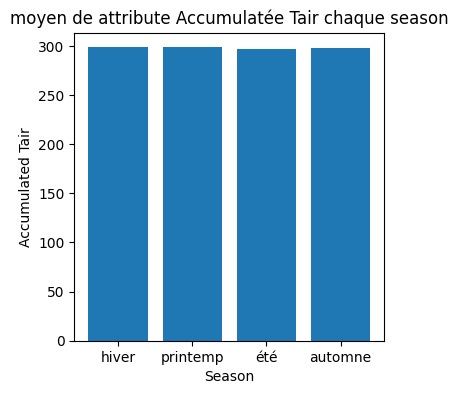

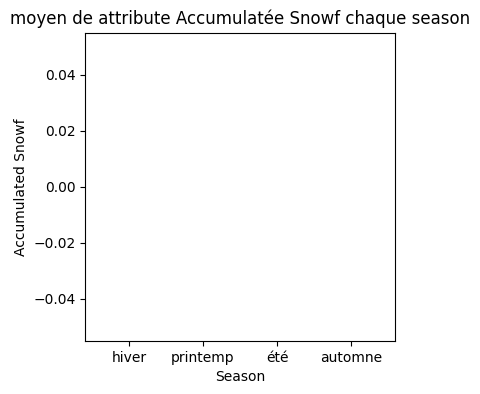

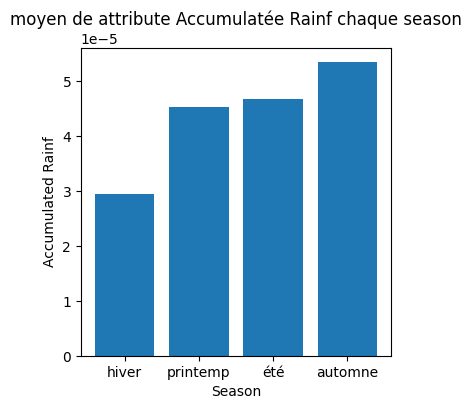

In [75]:
Seasons = ["2019-01-01" , "2019-03-21" , "2019-06-21" , "2019-09-21" , "2019-12-21"]
variables = ['PSurf', 'Wind', 'Qair', 'Tair', 'Snowf', 'Rainf']
#Deviding Dataset into seasons datasets
df_season1 = df_climat[(df_climat["time"]<="2019-03-21")|(df_climat["time"]>"2019-12-21")]
df_season2 = df_climat[(df_climat["time"]>="2019-03-21")&(df_climat["time"]<"2019-06-21")]
df_season3 = df_climat[(df_climat["time"]>="2019-06-21")&(df_climat["time"]<"2019-09-21")]
df_season4 = df_climat[(df_climat["time"]>="2019-09-21")&(df_climat["time"]<"2019-12-21")]
print("done")
for var in variables:
    season_data = [
        sum(df_season1[var]) / len(df_season1),
        sum(df_season2[var]) / len(df_season2),
        sum(df_season3[var]) / len(df_season3),
        sum(df_season4[var]) / len(df_season4),
    ]
    plt.figure(figsize=(4, 4))  # Create a new figure for each variable
    plt.bar(['hiver', 'printemp', 'été', 'automne'], season_data)
    plt.xlabel("Season")
    plt.ylabel(f"Accumulated {var}")
    plt.title(f"moyen de attribute Accumulatée {var} chaque season")
    plt.show()

we can drop snow column bcs its always 0 

In [73]:
df_climat = df_climat.drop(columns=["Snowf"])
df_climat.head()

,time,PSurf,Wind,Qair,Tair,Rainf
0,2019-01-01 00:00:00,89065.266,0.821201,0.013997,291.04965,0.000545
1,2019-01-01 00:00:00,89670.760,1.245674,0.014514,291.70743,0.000000
2,2019-01-01 00:00:00,90563.360,1.164034,0.014357,291.66382,0.000438
3,2019-01-01 00:00:00,91422.460,1.046393,0.014764,292.07610,0.000140
4,2019-01-01 00:00:00,91752.500,0.962537,0.016113,293.50247,0.000028


### b. Scatter plot (instead of using a scatter plot we will use a heat map to extract the correlation)

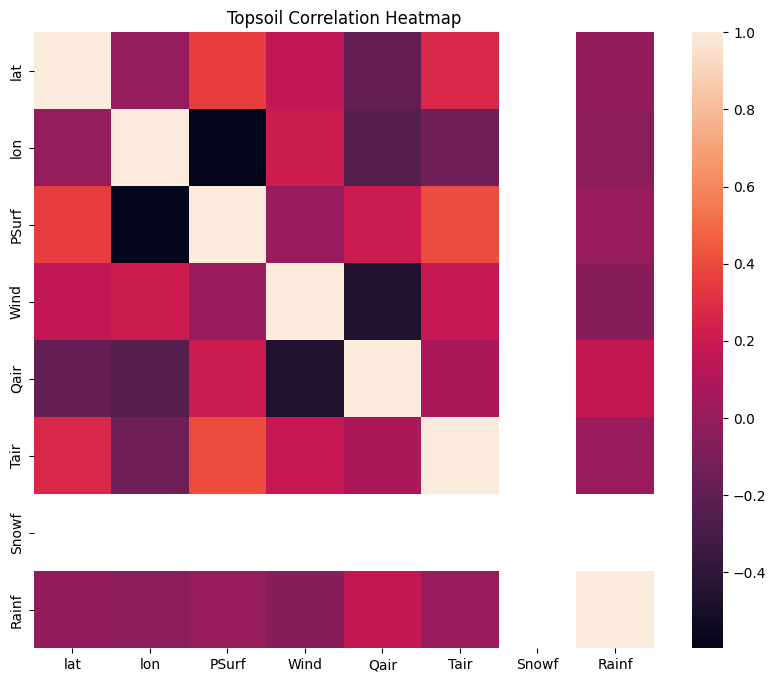

In [22]:
df_corr = df_climat.drop(columns=["time"])
plt.figure(figsize=(10, 8))  
p1 = sns.heatmap(df_corr.corr())
plt.title('Topsoil Correlation Heatmap')
plt.show()

There is no correlation between columns besides the snow because its always 0

## Data Preprocessing

loading climat data

In [33]:
df_climat = pd.read_csv("output.csv")
print("abdelkader")
df_climat = df_climat.drop(columns=["lat" , "lon"]).drop_duplicates()
df_climat
df_climat.info()

abdelkader
<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    499 non-null    object 
 1   PSurf   499 non-null    float64
 2   Wind    499 non-null    float64
 3   Qair    499 non-null    float64
 4   Tair    499 non-null    float64
 5   Snowf   499 non-null    float64
 6   Rainf   499 non-null    float64
dtypes: float64(6), object(1)
memory usage: 31.2+ KB


Min - Max and Z-score normalization

In [6]:
df_minmax = pd.DataFrame()
df_zscore = pd.DataFrame()

for column in df_climat.columns:
    if df_climat[column].dtype == 'float64':
        mean_value = df_climat[column].mean()
        std_value = df_climat[column].std()
        bas = min(df_climat[column])
        haut = max(df_climat[column])
        gap = haut - bas
        df_minmax[column] = (df_climat[column] - bas)/gap
        df_zscore[column] = ((df_climat[column]) - mean_value)/std_value

print(df_minmax.head)
print(df_zscore.head)


<bound method NDFrame.head of         PSurf      Wind      Qair      Tair  Snowf     Rainf
0    0.582255  0.154195  0.443391  0.429054    NaN  0.461487
1    0.610211  0.262115  0.494417  0.466592    NaN  0.000000
2    0.651421  0.241359  0.478987  0.464104    NaN  0.370804
3    0.691085  0.211449  0.519134  0.487632    NaN  0.118694
4    0.706323  0.190129  0.652379  0.569032    NaN  0.023394
..        ...       ...       ...       ...    ...       ...
494  0.566225  0.767575  0.826633  1.000000    NaN  0.091552
495  0.562652  0.628733  0.591133  0.777016    NaN  0.280018
496  0.553433  0.565459  0.273933  0.461967    NaN  0.318589
497  0.513160  0.374505  0.447193  0.490558    NaN  0.192755
498  0.452879  0.268978  0.396678  0.393627    NaN  0.000000

[499 rows x 6 columns]>
<bound method NDFrame.head of         PSurf      Wind      Qair      Tair  Snowf     Rainf
0   -0.410219 -0.733467 -0.583642 -1.065449    NaN  3.907207
1   -0.255248 -0.094041 -0.327929 -0.766020    NaN -0.322096


Data reduction via discretization of continuous data: Equal Frequency

In [70]:
df_disc = pd.DataFrame()
#Q = int(input(f"Choose number of intervals for All columns : "))
Q = 5

def discritize(df_climat, column):
    if df_climat[column].dtype in ['float64', 'int64']:
        intervals = []
        # Ask for the number of quantiles
        sorted_data = df_climat[column]


        sorted_data.sort_values()
        #sorted_data = sorted(df_climat[column].unique())
        N = len(sorted_data)
        # Only solution found is to drop duplicated values to keep strict monotony


        # Generate labels for each quantile
        labels = [f"Q{i+1}" for i in range(Q)]
        #
        for i in range(Q+1):
            position = int(N * i / Q)  
            intervals.append(sorted_data[min(position, N - 1)]) 
        
        intervals = set(intervals)
        print(len(intervals))
        interv = sorted(set(intervals))
        print(len(interv))
        
        df_disc[column] = pd.cut(df_climat[column], bins=interv, labels=labels, include_lowest=True)
        
        # Display the counts in each quantile
        print(f"\nQuantile distribution for column '{column}':")
        print(df_disc[column].value_counts())
        return(df_disc)

discritize(df_climat, input("culomn ?: "))


6
6

Quantile distribution for column 'Qair':
Qair
Q3    158
Q5    105
Q2     39
Q4     13
Q1      3
Name: count, dtype: int64


,Qair
0,Q2
1,Q3
2,Q3
3,Q3
4,Q4
...,...
494,NaN
495,Q3
496,NaN
497,Q3


Discretization using the Amplitude method

In [ ]:
import math

def Amplitude(df , column):
    try : 
        intervals = []
        k = int(1 + (10/3) * math.log10(len(df)))
        max_val = max(df[column])
        min_val = min(df[column])

        width = (max_val - min_val) / k
        for i in range(k+1):
            intervals.append(min_val)
            min_val+=width
        #labels = [(intervals[i] + intervals[i+1]) / 2 for i in range(len(intervals)-1)]
        df[column]  = pd.cut(df[column] , intervals )# labels = labels)
        print(df[column].value_counts())
        return df
    except Exception as e: 
        print("non numerical values detected")

Amplitude(df_climat , input("Insert column (PSurf, Qair, Wind, Snowf)"))

Qair
0.016821    123
0.015695     87
0.014570     86
0.013445     81
0.012319     47
0.017946     29
0.019071     21
0.011194     18
0.010069      5
Name: count, dtype: int64


,time,PSurf,Wind,Qair,Tair,Snowf,Rainf
0,2019-01-01 00:00:00,89065.266,0.821201,0.013445,291.04965,0.0,0.000545
1,2019-01-01 00:00:00,89670.760,1.245674,0.014570,291.70743,0.0,0.000000
2,2019-01-01 00:00:00,90563.360,1.164034,0.014570,291.66382,0.0,0.000438
3,2019-01-01 00:00:00,91422.460,1.046393,0.014570,292.07610,0.0,0.000140
4,2019-01-01 00:00:00,91752.500,0.962537,0.015695,293.50247,0.0,0.000028
...,...,...,...,...,...,...,...
494,2019-01-01 00:00:00,88718.060,3.233748,0.017946,301.05432,0.0,0.000108
495,2019-01-01 00:00:00,88640.660,2.687654,0.015695,297.14697,0.0,0.000331
496,2019-01-01 00:00:00,88440.980,2.438788,0.012319,291.62637,0.0,0.000376
497,2019-01-01 00:00:00,87568.700,1.687726,0.014570,292.12738,0.0,0.000228


Data reduction (elimination of redundancies) horizontal / vertical.

In [75]:
# horizontally
for column in df_climat.columns:
    df_temp = df_climat[column].drop_duplicates()
    dropped = len(df_climat[column]) - len(df_temp)
    df_climat[column].drop_duplicates()
    print(f"Number of dropped values in column {column}: {dropped}")

Number of dropped values in column time: 498
Number of dropped values in column PSurf: 0
Number of dropped values in column Wind: 0
Number of dropped values in column Qair: 489
Number of dropped values in column Tair: 1
Number of dropped values in column Snowf: 498
Number of dropped values in column Rainf: 399


In [ ]:
# we drop the Snowf column since it's an empty one.
df_climat = df_climat.drop('Snowf', axis=1)
df_climat.head

<bound method NDFrame.head of                     time      PSurf      Wind      Qair       Tair     Rainf
0    2019-01-01 00:00:00  89065.266  0.821201  0.013445  291.04965  0.000545
1    2019-01-01 00:00:00  89670.760  1.245674  0.014570  291.70743  0.000000
2    2019-01-01 00:00:00  90563.360  1.164034  0.014570  291.66382  0.000438
3    2019-01-01 00:00:00  91422.460  1.046393  0.014570  292.07610  0.000140
4    2019-01-01 00:00:00  91752.500  0.962537  0.015695  293.50247  0.000028
..                   ...        ...       ...       ...        ...       ...
494  2019-01-01 00:00:00  88718.060  3.233748  0.017946  301.05432  0.000108
495  2019-01-01 00:00:00  88640.660  2.687654  0.015695  297.14697  0.000331
496  2019-01-01 00:00:00  88440.980  2.438788  0.012319  291.62637  0.000376
497  2019-01-01 00:00:00  87568.700  1.687726  0.014570  292.12738  0.000228
498  2019-01-01 00:00:00  86263.040  1.272667  0.013445  290.42886  0.000000

[499 rows x 6 columns]>

Or we can plot a heatmap to display correlation between some attributes, Highly correlated attributes will have one of them deleted, to only keep essetial data, this approach is one possible among other in data prprocessing methods, and it's use should be wisely considered depending on the usescase, and the desired outcome

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
p2 = sns.heatmap(df_result.corr())
plt.title('Subsoil Correlation Heatmap')
plt.show()